In [1]:
import imbrium
import pandas as pd
print(imbrium.__version__)

1.1.0


In [2]:
from imbrium.predictors.univarpure import OptimizePureUni, PureUni
from imbrium.utils.optimization import seeker

In [3]:
data = pd.read_csv('example_dataset/CaliforniaHousing.csv')
data = data['target']

## UnivarMultiStep

Epoch 1/7
516/516 [==============================] - 2s 3ms/step - loss: 0.7800 - mean_squared_error: 0.7800 - val_loss: 0.5190 - val_mean_squared_error: 0.5190
Epoch 2/7
516/516 [==============================] - 1s 2ms/step - loss: 0.5341 - mean_squared_error: 0.5341 - val_loss: 0.5195 - val_mean_squared_error: 0.5195
Epoch 2: early stopping


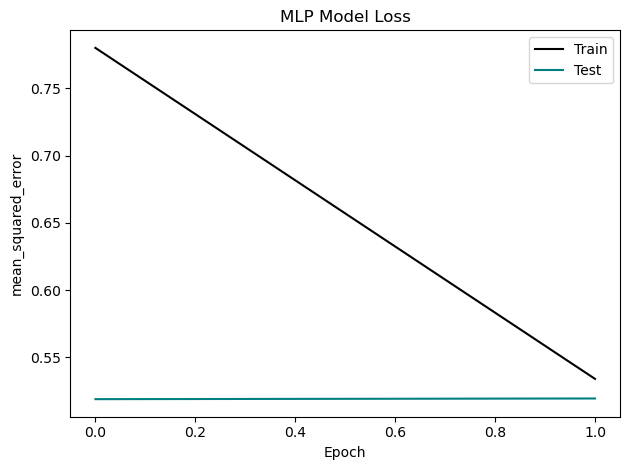

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                150       
                                                                 
 dense_1 (Dense)             (None, 5)                 130       
                                                                 
 dense_2 (Dense)             (None, 25)                150       
                                                                 
 dense_3 (Dense)             (None, 10)                260       
                                                                 
Total params: 690
Trainable params: 690
Non-trainable params: 0
_________________________________________________________________


In [4]:
predictor1 = PureUni(steps_past =  5, steps_future = 10, data = data, scale = '')

predictor1.create_mlp(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                      layer_config = {'layer0': (25, 'relu'), 'layer1': (5,'relu'), 'layer2': (25, 'relu')}
                     )

predictor1.fit_model(epochs = 7,show_progress= 1, validation_split = 0.20, 
                     monitor='val_loss', patience=1, min_delta = 0, verbose = 1
                    )

predictor1.show_performance()
predictor1.predict(data.tail(5))
predictor1.model_blueprint()

[I 2023-03-09 00:25:37,110] A new study created in memory with name: no-name-d7af8f53-a005-4464-ad6f-2162a5ec71f2
[I 2023-03-09 00:25:39,902] Trial 0 finished with value: 0.5528734922409058 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu'), 'layer2': (5, 'relu')}}. Best is trial 0 with value: 0.5528734922409058.
[I 2023-03-09 00:25:42,427] Trial 1 finished with value: 0.5478423237800598 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu'), 'layer2': (5, 'relu')}}. Best is trial 1 with value: 0.5478423237800598.
[I 2023-03-09 00:25:44,737] Trial 2 finished with value: 0.548959493637085 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (2, 'relu'), 'layer1': (5, 'relu'), 'layer2': (2, 'relu')}}. Best is trial 1 with value: 0.5478423237800598.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu'), 'layer2': (5, 'relu')}}
Best result: 0.5478423237800598


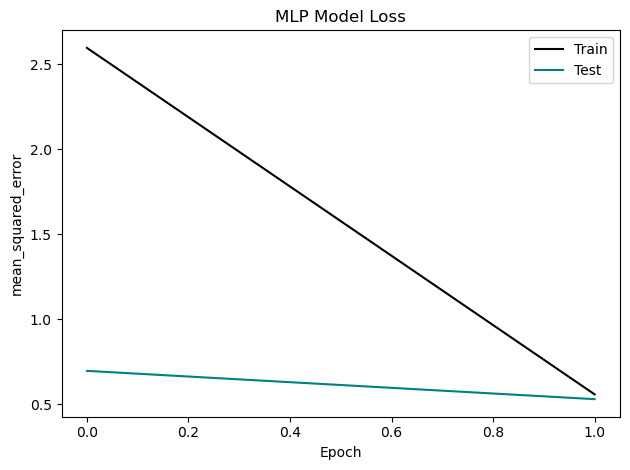

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 5)                 30        
                                                                 
 dense_17 (Dense)            (None, 10)                60        
                                                                 
 dense_18 (Dense)            (None, 5)                 55        
                                                                 
 dense_19 (Dense)            (None, 10)                60        
                                                                 
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


In [5]:
predictor1 = OptimizePureUni(steps_past=5, steps_future=10, data=data, scale='')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (5, 'relu'), 'layer1': (10,'relu'), 'layer2': (5, 'relu')},
            {'layer0': (2, 'relu'), 'layer1': (5, 'relu'), 'layer2': (2, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_mlp(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1)
predictor1.show_performance()
predictor1.predict(data.tail(5))
predictor1.model_blueprint()

Epoch 1/7
516/516 [==============================] - 5s 6ms/step - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 2/7
516/516 [==============================] - 3s 6ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 3/7
516/516 [==============================] - 3s 6ms/step - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 4/7
516/516 [==============================] - 3s 6ms/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 4: early stopping


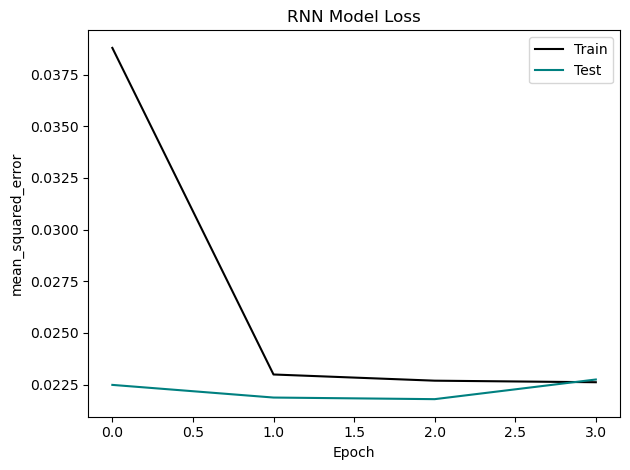

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5, 20)             440       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5, 25)             1150      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 5)                 155       
                                                                 
 dense_20 (Dense)            (None, 10)                60        
                                                                 
Total params: 1,805
Trainable params: 1,805
Non-trainable params: 0
_________________________________________________________________


In [6]:
predictor2 = PureUni(steps_past =  5, steps_future = 10, data = data, scale = 'normalize')

predictor2.create_rnn(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error',
                      layer_config = {'layer0': (20, 'relu'), 'layer1': (25,'relu'), 'layer2': (5, 'relu')}
                     )

predictor2.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, monitor='val_loss',
                     patience=1, min_delta = 0, verbose = 1
                    )

predictor2.show_performance()
predictor2.predict(data.tail(5))
predictor2.model_blueprint()

[I 2023-03-09 00:26:02,805] A new study created in memory with name: no-name-25b4caa1-5050-4848-8225-3827f88a98bd
[I 2023-03-09 00:26:10,698] Trial 0 finished with value: 0.06281542778015137 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (2, 'relu'), 'layer1': (5, 'relu'), 'layer2': (2, 'relu')}}. Best is trial 0 with value: 0.06281542778015137.
[I 2023-03-09 00:26:18,942] Trial 1 finished with value: 0.025745216757059097 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu'), 'layer2': (5, 'relu')}}. Best is trial 1 with value: 0.025745216757059097.
[I 2023-03-09 00:26:26,915] Trial 2 finished with value: 0.025910358875989914 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (100, 'relu'), 'layer1': (50, 'relu'), 'layer2': (25, 'relu')}}. Best is trial 1 with value: 0.025745216757059097.
[I 2023-03-09 00:26:33,987] Trial 3 finished with value: 0.027080871164798737 and parameters: {'optimizer': 'adam', 'layer_

Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu'), 'layer2': (5, 'relu')}}
Best result: 0.025745216757059097


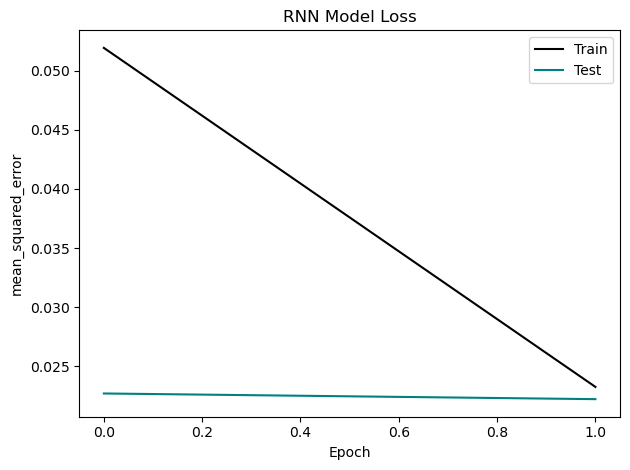

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, 5, 5)              35        
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 5, 10)             160       
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 5)                 80        
                                                                 
 dense_25 (Dense)            (None, 10)                60        
                                                                 
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________


In [7]:
predictor2 = OptimizePureUni(steps_past=5, steps_future=10, data=data, scale='normalize')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (5, 'relu'), 'layer1': (10,'relu'), 'layer2': (5, 'relu')},
            {'layer0': (2, 'relu'), 'layer1': (5, 'relu'), 'layer2': (2, 'relu')},
            {'layer0': (100, 'relu'), 'layer1': (50, 'relu'), 'layer2': (25, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 4)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_rnn(*args, **kwargs)

create_fit_model(predictor2, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor2.show_performance()
predictor2.predict(data.tail(5))
predictor2.model_blueprint()

Epoch 1/10
516/516 [==============================] - 8s 10ms/step - loss: 0.5545 - mean_squared_error: 0.5545 - val_loss: 0.4142 - val_mean_squared_error: 0.4142
Epoch 2/10
516/516 [==============================] - 5s 9ms/step - loss: 0.4028 - mean_squared_error: 0.4028 - val_loss: 0.3863 - val_mean_squared_error: 0.3863
Epoch 3/10
516/516 [==============================] - 4s 9ms/step - loss: 0.3968 - mean_squared_error: 0.3968 - val_loss: 0.3956 - val_mean_squared_error: 0.3956
Epoch 4/10
516/516 [==============================] - 5s 9ms/step - loss: 0.3966 - mean_squared_error: 0.3966 - val_loss: 0.3893 - val_mean_squared_error: 0.3893
Epoch 5/10
516/516 [==============================] - 4s 9ms/step - loss: 0.3960 - mean_squared_error: 0.3960 - val_loss: 0.3848 - val_mean_squared_error: 0.3848
Epoch 6/10
516/516 [==============================] - 5s 9ms/step - loss: 0.3956 - mean_squared_error: 0.3956 - val_loss: 0.3843 - val_mean_squared_error: 0.3843
Epoch 7/10
516/516 [=======

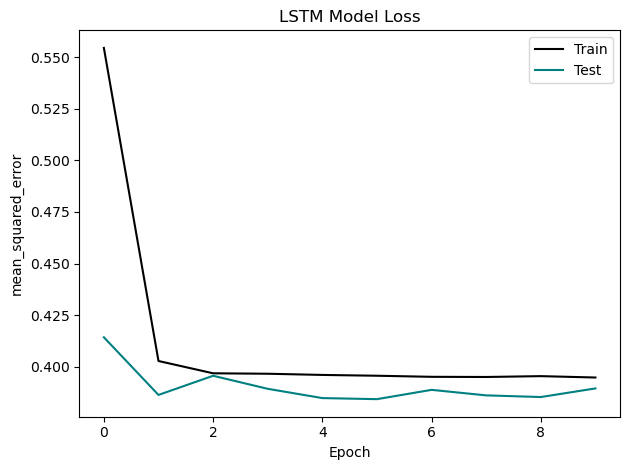

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 20)             1760      
                                                                 
 lstm_1 (LSTM)               (None, 5, 25)             4600      
                                                                 
 lstm_2 (LSTM)               (None, 5)                 620       
                                                                 
 dense_26 (Dense)            (None, 10)                60        
                                                                 
Total params: 7,040
Trainable params: 7,040
Non-trainable params: 0
_________________________________________________________________


In [8]:
predictor3 = PureUni(steps_past =  5, steps_future = 10, data = data, scale = 'standard')

predictor3.create_lstm(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error',
                       layer_config = {'layer0': (20, 'relu'), 'layer1': (25,'relu'), 'layer2': (5, 'relu')}
                      )

predictor3.fit_model(epochs = 10, show_progress= 1, validation_split = 0.20)
predictor3.show_performance()
predictor3.predict(data.tail(5))
predictor3.model_blueprint()

[I 2023-03-09 00:27:32,371] A new study created in memory with name: no-name-21ee7858-bf00-4d20-b2f8-95baa6085a86
[I 2023-03-09 00:27:43,419] Trial 0 finished with value: 0.9678928256034851 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (2, 'relu'), 'layer1': (5, 'relu'), 'layer2': (2, 'relu')}}. Best is trial 0 with value: 0.9678928256034851.
[I 2023-03-09 00:27:54,127] Trial 1 finished with value: 0.9637171030044556 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu'), 'layer2': (5, 'relu')}}. Best is trial 1 with value: 0.9637171030044556.


Best hyperparameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu'), 'layer2': (5, 'relu')}}
Best result: 0.9637171030044556


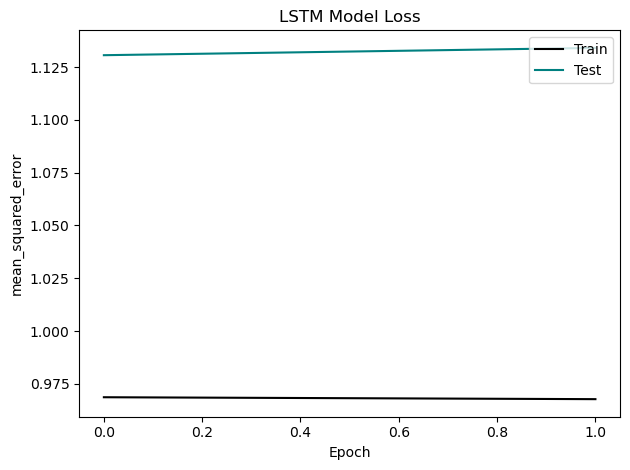

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 5, 5)              140       
                                                                 
 lstm_10 (LSTM)              (None, 5, 10)             640       
                                                                 
 lstm_11 (LSTM)              (None, 5)                 320       
                                                                 
 dense_29 (Dense)            (None, 10)                60        
                                                                 
Total params: 1,160
Trainable params: 1,160
Non-trainable params: 0
_________________________________________________________________


In [9]:
predictor3 = OptimizePureUni(steps_past=5, steps_future=10, data=data, scale='standard')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (5, 'relu'), 'layer1': (10,'relu'), 'layer2': (5, 'relu')},
            {'layer0': (2, 'relu'), 'layer1': (5, 'relu'), 'layer2': (2, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 2)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_lstm(*args, **kwargs)

create_fit_model(predictor3, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor3.show_performance()
predictor3.predict(data.tail(5))
predictor3.model_blueprint()

Epoch 1/2
516/516 [==============================] - 8s 9ms/step - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 2/2
516/516 [==============================] - 4s 8ms/step - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0235 - val_mean_squared_error: 0.0235


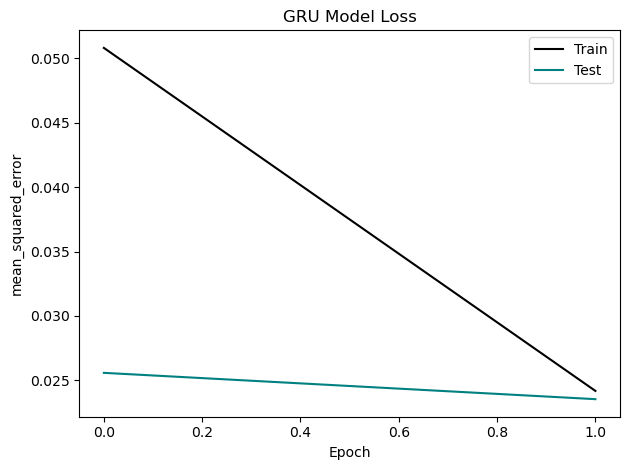

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 20)             1380      
                                                                 
 gru_1 (GRU)                 (None, 5, 25)             3525      
                                                                 
 gru_2 (GRU)                 (None, 5)                 480       
                                                                 
 dense_30 (Dense)            (None, 10)                60        
                                                                 
Total params: 5,445
Trainable params: 5,445
Non-trainable params: 0
_________________________________________________________________


In [10]:
predictor4 = PureUni(steps_past =  5, steps_future = 10, data = data, scale = 'minmax')

predictor4.create_gru(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error',
                      layer_config = {'layer0': (20, 'relu'), 'layer1': (25,'relu'), 'layer2': (5, 'relu')}
                     )
predictor4.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor4.show_performance()
predictor4.predict(data.tail(5))
predictor4.model_blueprint()

[I 2023-03-09 00:28:19,486] A new study created in memory with name: no-name-ecafaf2a-5d2d-47b2-861f-b5940f255f5c
[I 2023-03-09 00:28:31,551] Trial 0 finished with value: 0.023122576996684074 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu'), 'layer2': (5, 'relu')}}. Best is trial 0 with value: 0.023122576996684074.
[I 2023-03-09 00:28:43,382] Trial 1 finished with value: 0.023375147953629494 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu'), 'layer2': (5, 'relu')}}. Best is trial 0 with value: 0.023122576996684074.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu'), 'layer2': (5, 'relu')}}
Best result: 0.023122576996684074


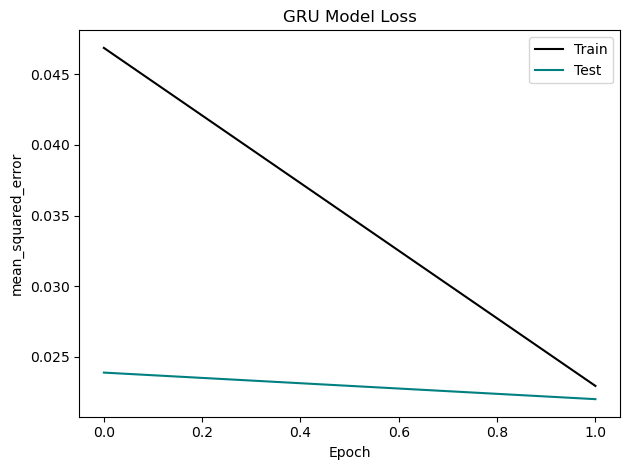

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_9 (GRU)                 (None, 5, 5)              120       
                                                                 
 gru_10 (GRU)                (None, 5, 10)             510       
                                                                 
 gru_11 (GRU)                (None, 5)                 255       
                                                                 
 dense_33 (Dense)            (None, 10)                60        
                                                                 
Total params: 945
Trainable params: 945
Non-trainable params: 0
_________________________________________________________________


In [11]:
predictor4 = OptimizePureUni(steps_past=5, steps_future=10, data=data, scale='minmax')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (5, 'relu'), 'layer1': (10,'relu'), 'layer2': (5, 'relu')},
            {'layer0': (2, 'relu'), 'layer1': (5, 'relu'), 'layer2': (2, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 2)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_gru(*args, **kwargs)

create_fit_model(predictor4, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor4.show_performance()
predictor4.predict(data.tail(5))
predictor4.model_blueprint()

Epoch 1/2
516/516 [==============================] - 2s 2ms/step - loss: 2.1178 - mean_squared_error: 2.1178 - val_loss: 0.6335 - val_mean_squared_error: 0.6335
Epoch 2/2
516/516 [==============================] - 1s 2ms/step - loss: 0.6190 - mean_squared_error: 0.6190 - val_loss: 0.6207 - val_mean_squared_error: 0.6207


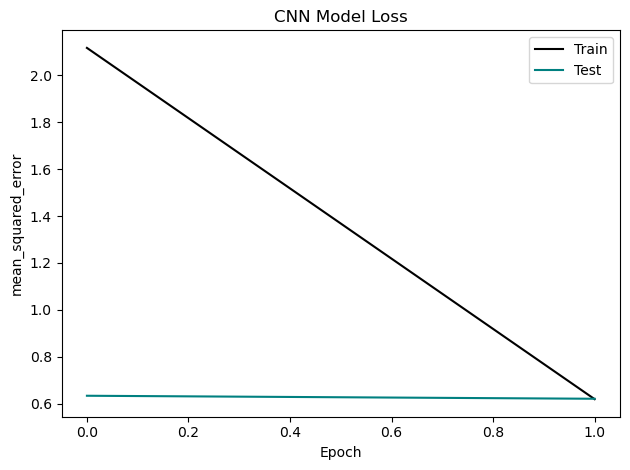

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 8)              16        
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 4)              36        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 4)             0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense_34 (Dense)            (None, 5)                 45        
                                                                 
 dense_35 (Dense)            (None, 10)                60        
                                                     

In [12]:
predictor5 = PureUni(steps_past =  5, steps_future = 10, data = data, scale = '')

predictor5.create_cnn(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error',
                      layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu')}
                     )

predictor5.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor5.show_performance()
predictor5.predict(data.tail(5))
predictor5.model_blueprint()

[I 2023-03-09 00:28:58,735] A new study created in memory with name: no-name-4df9f172-e6e2-4570-8586-d7712239a4e6
[I 2023-03-09 00:29:01,785] Trial 0 finished with value: 0.7342751622200012 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (16, 1, 'relu'), 'layer1': (8, 1, 'relu'), 'layer2': 4, 'layer3': (10, 'sigmoid')}}. Best is trial 0 with value: 0.7342751622200012.
[I 2023-03-09 00:29:05,045] Trial 1 finished with value: 0.6066873669624329 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu')}}. Best is trial 1 with value: 0.6066873669624329.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu')}}
Best result: 0.6066873669624329


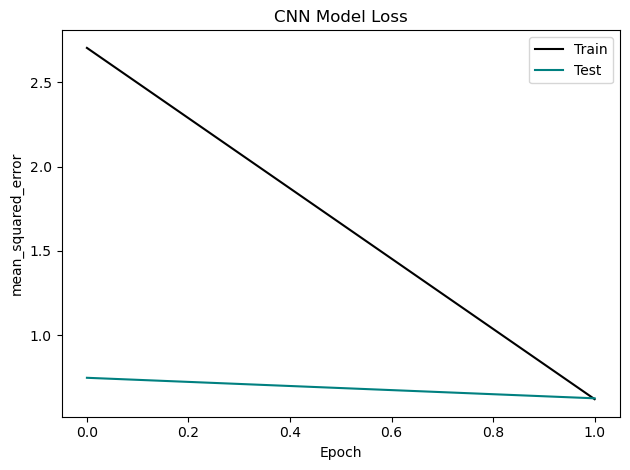

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 5, 8)              16        
                                                                 
 conv1d_7 (Conv1D)           (None, 5, 4)              36        
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 2, 4)             0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 8)                 0         
                                                                 
 dense_40 (Dense)            (None, 5)                 45        
                                                                 
 dense_41 (Dense)            (None, 10)                60        
                                                     

In [13]:
predictor5 = OptimizePureUni(steps_past=5, steps_future=10, data=data, scale='')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu')},
            {'layer0': (16, 1, 'relu'), 'layer1': (8, 1, 'relu'), 'layer2': (4), 'layer3': (10, 'sigmoid')}
        ], 
        optimization_target='minimize', n_trials = 2)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_cnn(*args, **kwargs)

create_fit_model(predictor5, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor5.show_performance()
predictor5.predict(data.tail(5))
predictor5.model_blueprint()

Epoch 1/2
516/516 [==============================] - 5s 6ms/step - loss: 0.6264 - mean_squared_error: 0.6264 - val_loss: 0.4193 - val_mean_squared_error: 0.4193
Epoch 2/2
516/516 [==============================] - 3s 5ms/step - loss: 0.4059 - mean_squared_error: 0.4059 - val_loss: 0.3913 - val_mean_squared_error: 0.3913


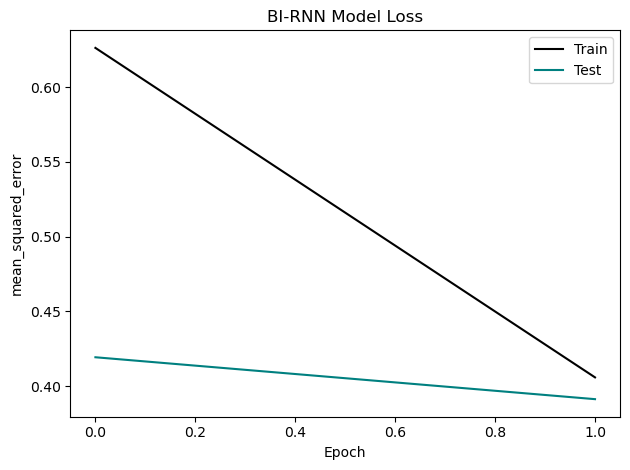

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 5, 30)            510       
 l)                                                              
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 5)                 180       
                                                                 
 dense_42 (Dense)            (None, 10)                60        
                                                                 
Total params: 750
Trainable params: 750
Non-trainable params: 0
_________________________________________________________________


In [14]:
predictor6 = PureUni(steps_past =  5, steps_future = 10, data = data, scale = 'standard')

predictor6.create_birnn(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error',
                        layer_config = {'layer0': (15, 'relu'), 'layer1': (5, 'relu')}
                       )
predictor6.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor6.show_performance()
predictor6.predict(data.tail(5))
predictor6.model_blueprint()

[I 2023-03-09 00:29:16,688] A new study created in memory with name: no-name-b1dd9b7e-450c-4b80-af52-e89544a5801e
[I 2023-03-09 00:29:23,354] Trial 0 finished with value: 0.753512978553772 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (5, 'relu')}}. Best is trial 0 with value: 0.753512978553772.
[I 2023-03-09 00:29:30,920] Trial 1 finished with value: 0.4036789834499359 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu')}}. Best is trial 1 with value: 0.4036789834499359.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu')}}
Best result: 0.4036789834499359


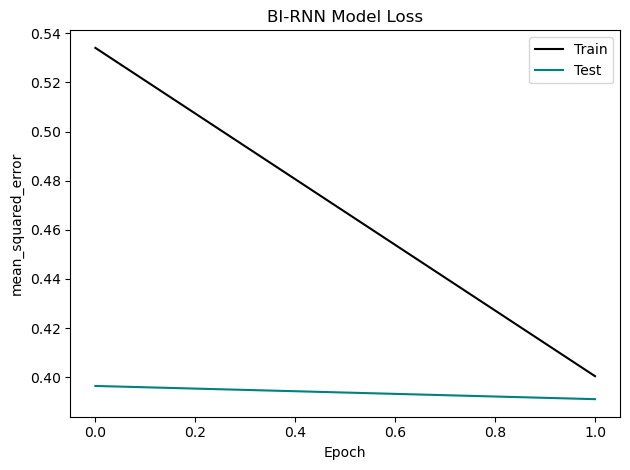

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 5, 10)            70        
 nal)                                                            
                                                                 
 simple_rnn_25 (SimpleRNN)   (None, 10)                210       
                                                                 
 dense_45 (Dense)            (None, 10)                110       
                                                                 
Total params: 390
Trainable params: 390
Non-trainable params: 0
_________________________________________________________________


In [15]:
predictor6 = OptimizePureUni(steps_past=5, steps_future=10, data=data, scale='standard')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (15, 'relu'), 'layer1': (5, 'relu')},
            {'layer0': (5, 'relu'), 'layer1': (10, 'relu')},
            {'layer0': (100, 'relu'), 'layer1': (50, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 2)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_birnn(*args, **kwargs)

create_fit_model(predictor6, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor6.show_performance()
predictor6.predict(data.tail(5))
predictor6.model_blueprint()

Epoch 1/7
516/516 [==============================] - 7s 8ms/step - loss: 0.0604 - mean_squared_error: 0.0604 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 2/7
516/516 [==============================] - 4s 7ms/step - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 3/7
516/516 [==============================] - 4s 7ms/step - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 4/7
516/516 [==============================] - 4s 7ms/step - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 4: early stopping


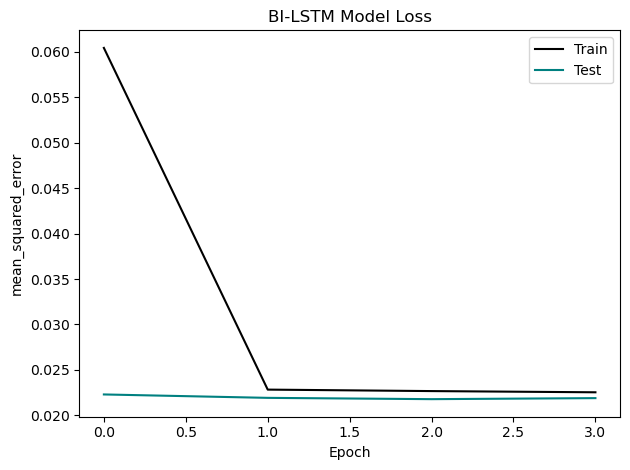

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 5, 30)            2040      
 nal)                                                            
                                                                 
 lstm_13 (LSTM)              (None, 5)                 720       
                                                                 
 dense_46 (Dense)            (None, 10)                60        
                                                                 
Total params: 2,820
Trainable params: 2,820
Non-trainable params: 0
_________________________________________________________________


In [16]:
predictor7 = PureUni(steps_past =  5, steps_future = 10, data = data, scale = 'minmax')

predictor7.create_bilstm(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error',
                         layer_config = {'layer0': (15, 'relu'), 'layer1': (5, 'relu')}
                        )
predictor7.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20,
                     monitor='val_loss', patience=1, min_delta = 0, verbose = 1
                    )

predictor7.show_performance()
predictor7.predict(data.tail(5))
predictor7.model_blueprint()

[I 2023-03-09 00:29:58,011] A new study created in memory with name: no-name-1598dc10-cea9-43d8-8e15-75935c8e5d21
[I 2023-03-09 00:30:09,805] Trial 0 finished with value: 0.39893507957458496 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu')}}. Best is trial 0 with value: 0.39893507957458496.
[I 2023-03-09 00:30:35,721] Trial 1 finished with value: 0.39763855934143066 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (100, 'relu'), 'layer1': (50, 'relu')}}. Best is trial 1 with value: 0.39763855934143066.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (100, 'relu'), 'layer1': (50, 'relu')}}
Best result: 0.39763855934143066


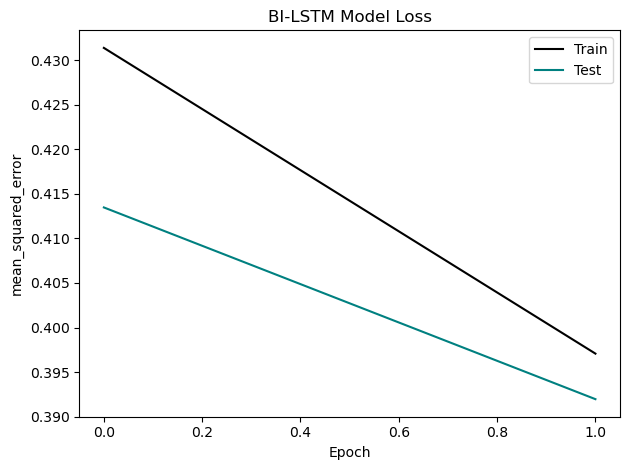

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_7 (Bidirectio  (None, 5, 200)           81600     
 nal)                                                            
                                                                 
 lstm_19 (LSTM)              (None, 50)                50200     
                                                                 
 dense_49 (Dense)            (None, 10)                510       
                                                                 
Total params: 132,310
Trainable params: 132,310
Non-trainable params: 0
_________________________________________________________________


In [17]:
predictor7 = OptimizePureUni(steps_past=5, steps_future=10, data=data, scale='standard')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (15, 'relu'), 'layer1': (5, 'relu')},
            {'layer0': (5, 'relu'), 'layer1': (10, 'relu')},
            {'layer0': (100, 'relu'), 'layer1': (50, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 2)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_bilstm(*args, **kwargs)

create_fit_model(predictor7, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor7.show_performance()
predictor7.predict(data.tail(5))
predictor7.model_blueprint()

Epoch 1/2
516/516 [==============================] - 8s 8ms/step - loss: 0.0504 - mean_squared_error: 0.0504 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 2/2
516/516 [==============================] - 4s 8ms/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0212 - val_mean_squared_error: 0.0212


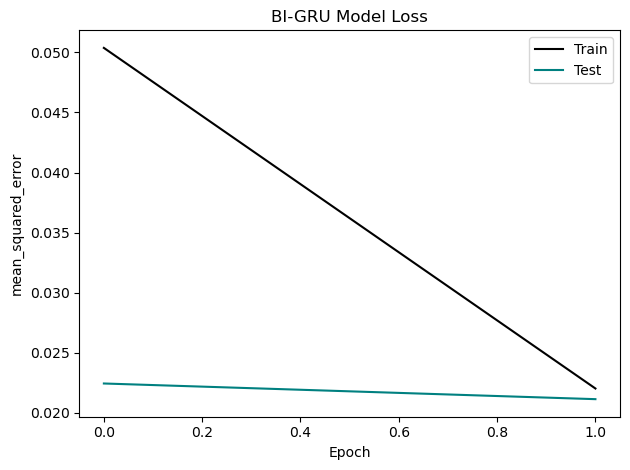

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirectio  (None, 5, 30)            1620      
 nal)                                                            
                                                                 
 gru_13 (GRU)                (None, 5)                 555       
                                                                 
 dense_50 (Dense)            (None, 10)                60        
                                                                 
Total params: 2,235
Trainable params: 2,235
Non-trainable params: 0
_________________________________________________________________


In [18]:
predictor8 = PureUni(steps_past =  5, steps_future = 10, data = data, scale = 'maxabs')

predictor8.create_bigru(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error',
                        layer_config = {'layer0': (15, 'relu'), 'layer1': (5, 'relu')}
                       )
predictor8.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor8.show_performance()
predictor8.predict(data.tail(5))
predictor8.model_blueprint()

[I 2023-03-09 00:31:16,231] A new study created in memory with name: no-name-495eef2c-f989-4727-b407-482ce68d8b5c
[I 2023-03-09 00:31:41,531] Trial 0 finished with value: 0.02129904367029667 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (100, 'relu'), 'layer1': (50, 'relu')}}. Best is trial 0 with value: 0.02129904367029667.
[I 2023-03-09 00:31:53,036] Trial 1 finished with value: 0.02153696119785309 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu')}}. Best is trial 0 with value: 0.02129904367029667.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (100, 'relu'), 'layer1': (50, 'relu')}}
Best result: 0.02129904367029667


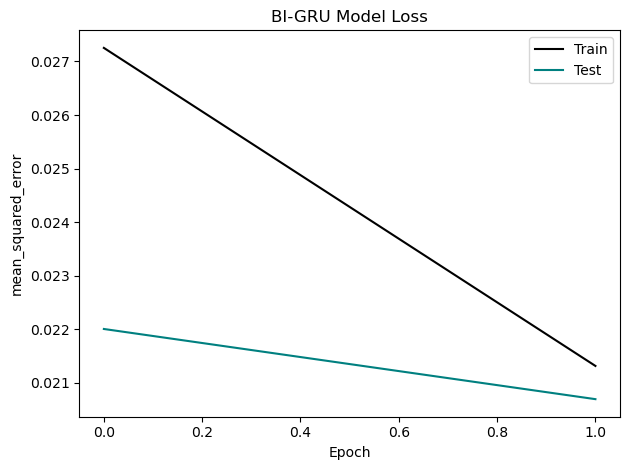

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_11 (Bidirecti  (None, 5, 200)           61800     
 onal)                                                           
                                                                 
 gru_19 (GRU)                (None, 50)                37800     
                                                                 
 dense_53 (Dense)            (None, 10)                510       
                                                                 
Total params: 100,110
Trainable params: 100,110
Non-trainable params: 0
_________________________________________________________________


In [19]:
predictor8 = OptimizePureUni(steps_past=5, steps_future=10, data=data, scale='maxabs')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (15, 'relu'), 'layer1': (5, 'relu')},
            {'layer0': (5, 'relu'), 'layer1': (10, 'relu')},
            {'layer0': (100, 'relu'), 'layer1': (50, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 2)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_bigru(*args, **kwargs)

create_fit_model(predictor8, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor8.show_performance()
predictor8.predict(data.tail(5))
predictor8.model_blueprint()

Epoch 1/2
516/516 [==============================] - 8s 9ms/step - loss: 0.0984 - mean_squared_error: 0.0984 - val_loss: 0.0720 - val_mean_squared_error: 0.0720
Epoch 2/2
516/516 [==============================] - 4s 9ms/step - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.0649 - val_mean_squared_error: 0.0649


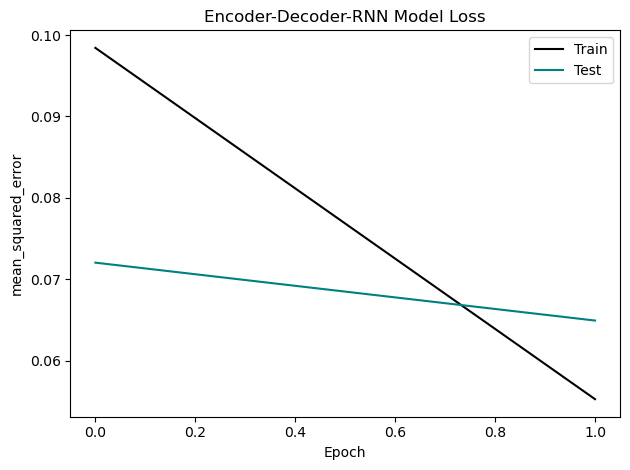

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_26 (SimpleRNN)   (None, 5, 50)             2600      
                                                                 
 simple_rnn_27 (SimpleRNN)   (None, 5)                 280       
                                                                 
 repeat_vector (RepeatVector  (None, 10, 5)            0         
 )                                                               
                                                                 
 simple_rnn_28 (SimpleRNN)   (None, 10, 5)             55        
                                                                 
 simple_rnn_29 (SimpleRNN)   (None, 10, 1)             7         
                                                                 
 time_distributed (TimeDistr  (None, 10, 1)            2         
 ibuted)                                             

In [20]:
predictor9 = PureUni(steps_past =  5, steps_future = 10, data = data, scale = 'normalize')

predictor9.create_encdec_rnn(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error',
                             layer_config = {'layer0': (50, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')})
predictor9.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor9.show_performance()
predictor9.predict(data.tail(5))
predictor9.model_blueprint()

[I 2023-03-09 00:32:31,828] A new study created in memory with name: no-name-53d66287-a6bf-4a6a-b102-dda77d9435a0
[I 2023-03-09 00:32:43,433] Trial 0 finished with value: 0.0552230179309845 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')}}. Best is trial 0 with value: 0.0552230179309845.
[I 2023-03-09 00:32:55,893] Trial 1 finished with value: 0.04313097894191742 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (15, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')}}. Best is trial 1 with value: 0.04313097894191742.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (15, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')}}
Best result: 0.04313097894191742


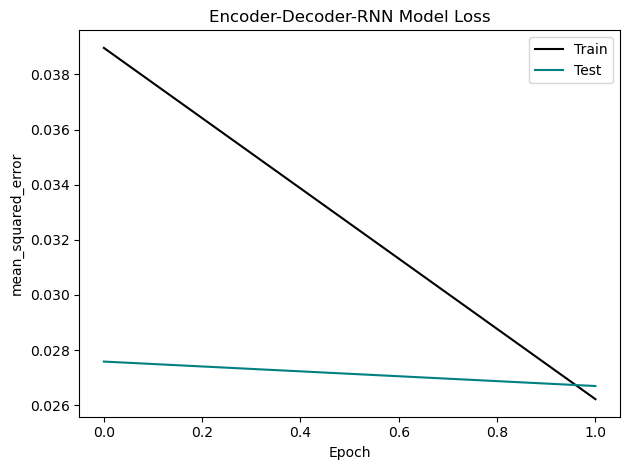

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_38 (SimpleRNN)   (None, 5, 15)             255       
                                                                 
 simple_rnn_39 (SimpleRNN)   (None, 15)                465       
                                                                 
 repeat_vector_3 (RepeatVect  (None, 10, 15)           0         
 or)                                                             
                                                                 
 simple_rnn_40 (SimpleRNN)   (None, 10, 5)             105       
                                                                 
 simple_rnn_41 (SimpleRNN)   (None, 10, 1)             7         
                                                                 
 time_distributed_3 (TimeDis  (None, 10, 1)            2         
 tributed)                                           

In [21]:
predictor9 = OptimizePureUni(steps_past=5, steps_future=10, data=data, scale='normalize')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')},
            {'layer0': (50, 'relu'), 'layer1': (50, 'relu'), 'layer2': (50, 'relu'), 'layer3': (50, 'relu')},
            {'layer0': (15, 'relu'), 'layer1': (15, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 2)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_encdec_rnn(*args, **kwargs)

create_fit_model(predictor9, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor9.show_performance()
predictor9.predict(data.tail(5))
predictor9.model_blueprint()

Epoch 1/2
516/516 [==============================] - 14s 17ms/step - loss: 0.0993 - mean_squared_error: 0.0993 - val_loss: 0.0724 - val_mean_squared_error: 0.0724
Epoch 2/2
516/516 [==============================] - 9s 17ms/step - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.0647 - val_mean_squared_error: 0.0647


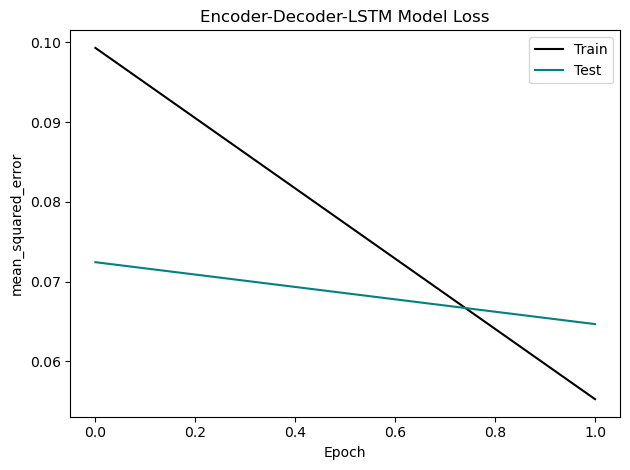

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 5, 50)             10400     
                                                                 
 lstm_21 (LSTM)              (None, 5)                 1120      
                                                                 
 repeat_vector_4 (RepeatVect  (None, 10, 5)            0         
 or)                                                             
                                                                 
 lstm_22 (LSTM)              (None, 10, 5)             220       
                                                                 
 lstm_23 (LSTM)              (None, 10, 1)             28        
                                                                 
 time_distributed_4 (TimeDis  (None, 10, 1)            2         
 tributed)                                           

In [22]:
predictor10 = PureUni(steps_past =  5, steps_future = 10, data = data, scale = 'normalize')
predictor10.create_encdec_lstm(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error', 
                               layer_config = {'layer0': (50, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')}
                              )
predictor10.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor10.show_performance()
predictor10.predict(data.tail(5))
predictor10.model_blueprint()

[I 2023-03-09 00:33:32,492] A new study created in memory with name: no-name-37e46f27-1b18-4f0a-aaa4-5b4f3c55b2bd
[I 2023-03-09 00:33:54,688] Trial 0 finished with value: 0.05528806895017624 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')}}. Best is trial 0 with value: 0.05528806895017624.
[I 2023-03-09 00:34:32,894] Trial 1 finished with value: 0.05471568927168846 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (50, 'relu'), 'layer1': (50, 'relu'), 'layer2': (50, 'relu'), 'layer3': (50, 'relu')}}. Best is trial 1 with value: 0.05471568927168846.


Best hyperparameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (50, 'relu'), 'layer1': (50, 'relu'), 'layer2': (50, 'relu'), 'layer3': (50, 'relu')}}
Best result: 0.05471568927168846


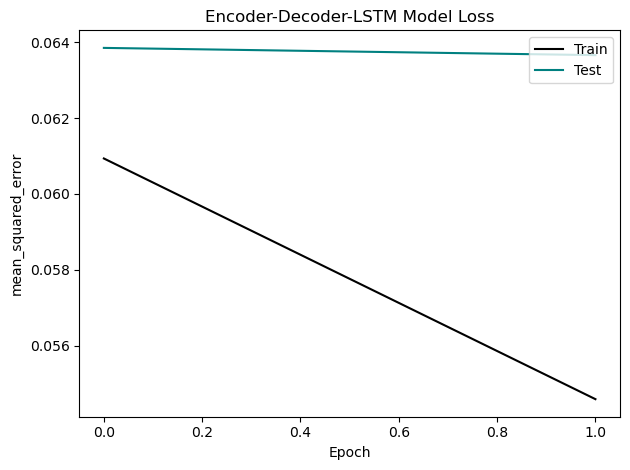

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 5, 50)             10400     
                                                                 
 lstm_33 (LSTM)              (None, 50)                20200     
                                                                 
 repeat_vector_7 (RepeatVect  (None, 10, 50)           0         
 or)                                                             
                                                                 
 lstm_34 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_35 (LSTM)              (None, 10, 50)            20200     
                                                                 
 time_distributed_7 (TimeDis  (None, 10, 1)            51        
 tributed)                                           

In [23]:
predictor10 = OptimizePureUni(steps_past=5, steps_future=10, data=data, scale='normalize')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')},
            {'layer0': (50, 'relu'), 'layer1': (50, 'relu'), 'layer2': (50, 'relu'), 'layer3': (50, 'relu')},
            {'layer0': (15, 'relu'), 'layer1': (15, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 2)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_encdec_lstm(*args, **kwargs)

create_fit_model(predictor10, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor10.show_performance()
predictor10.predict(data.tail(5))
predictor10.model_blueprint()

Epoch 1/2
516/516 [==============================] - 11s 13ms/step - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 2/2
516/516 [==============================] - 6s 11ms/step - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0256 - val_mean_squared_error: 0.0256


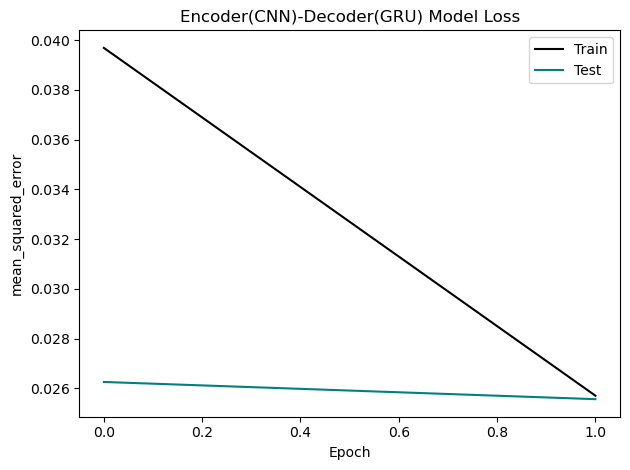

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 5, 8)              16        
                                                                 
 conv1d_9 (Conv1D)           (None, 5, 4)              36        
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 2, 4)             0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 8)                 0         
                                                                 
 repeat_vector_8 (RepeatVect  (None, 10, 8)            0         
 or)                                                             
                                                                 
 gru_20 (GRU)                (None, 10, 5)           

In [24]:
predictor11 = PureUni(steps_past =  5, steps_future = 10, data = data, scale = 'normalize')
predictor11.create_encdec_cnn(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error',
                              layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (1, 'relu')}
                             )
predictor11.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor11.show_performance()
predictor11.predict(data.tail(5))
predictor11.model_blueprint()

[I 2023-03-09 00:35:23,042] A new study created in memory with name: no-name-a3ad7259-2d93-4e34-981d-ad3f4ce0f48d
[I 2023-03-09 00:35:36,312] Trial 0 finished with value: 0.05479922518134117 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (4, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (1, 'relu')}}. Best is trial 0 with value: 0.05479922518134117.
[I 2023-03-09 00:35:51,638] Trial 1 finished with value: 0.05529112368822098 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (16, 2, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (1, 'relu')}}. Best is trial 0 with value: 0.05479922518134117.


Best hyperparameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (4, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (1, 'relu')}}
Best result: 0.05479922518134117


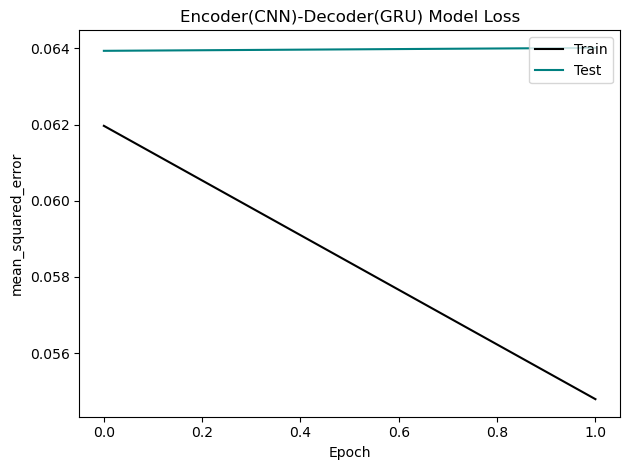

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 5, 4)              8         
                                                                 
 conv1d_15 (Conv1D)          (None, 5, 4)              20        
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 2, 4)             0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 8)                 0         
                                                                 
 repeat_vector_11 (RepeatVec  (None, 10, 8)            0         
 tor)                                                            
                                                                 
 gru_26 (GRU)                (None, 10, 5)           

In [25]:
predictor11 = OptimizePureUni(steps_past=5, steps_future=10, data=data, scale='normalize')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (16, 2, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (1, 'relu')},
            {'layer0': (32, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (1, 'relu')},
            {'layer0': (4, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (1, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 2)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_encdec_cnn(*args, **kwargs)

create_fit_model(predictor11, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor11.show_performance()
predictor11.predict(data.tail(5))
predictor11.model_blueprint()

Epoch 1/7
516/516 [==============================] - 14s 18ms/step - loss: 0.0989 - mean_squared_error: 0.0989 - val_loss: 0.0723 - val_mean_squared_error: 0.0723
Epoch 2/7
516/516 [==============================] - 9s 17ms/step - loss: 0.0553 - mean_squared_error: 0.0553 - val_loss: 0.0644 - val_mean_squared_error: 0.0644
Epoch 3/7
516/516 [==============================] - 9s 17ms/step - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.0643 - val_mean_squared_error: 0.0643
Epoch 4/7
516/516 [==============================] - 9s 18ms/step - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.0644 - val_mean_squared_error: 0.0644
Epoch 4: early stopping


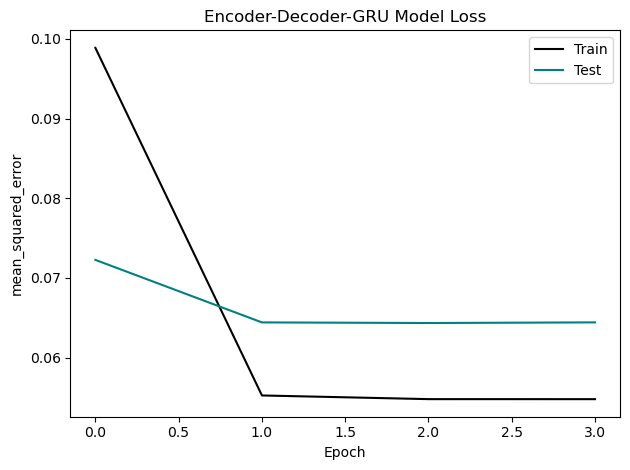

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_28 (GRU)                (None, 5, 50)             7950      
                                                                 
 gru_29 (GRU)                (None, 5)                 855       
                                                                 
 repeat_vector_12 (RepeatVec  (None, 10, 5)            0         
 tor)                                                            
                                                                 
 gru_30 (GRU)                (None, 10, 5)             180       
                                                                 
 gru_31 (GRU)                (None, 10, 1)             24        
                                                                 
 time_distributed_12 (TimeDi  (None, 10, 1)            2         
 stributed)                                          

In [26]:
predictor12 = PureUni(steps_past =  5, steps_future = 10, data = data, scale = 'minmax')

predictor12.create_encdec_gru(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error',
                              layer_config = {'layer0': (50, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')}
                             )
predictor12.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor12.show_performance()
predictor12.predict(data.tail(5))
predictor12.model_blueprint()

[I 2023-03-09 00:36:49,968] A new study created in memory with name: no-name-6fee1ec4-9443-4e6a-8a84-06ec5b64fa60
[I 2023-03-09 00:37:11,540] Trial 0 finished with value: 0.05479791760444641 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (25, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')}}. Best is trial 0 with value: 0.05479791760444641.
[I 2023-03-09 00:37:58,665] Trial 1 finished with value: 0.0553043931722641 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (200, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')}}. Best is trial 0 with value: 0.05479791760444641.


Best hyperparameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (25, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')}}
Best result: 0.05479791760444641


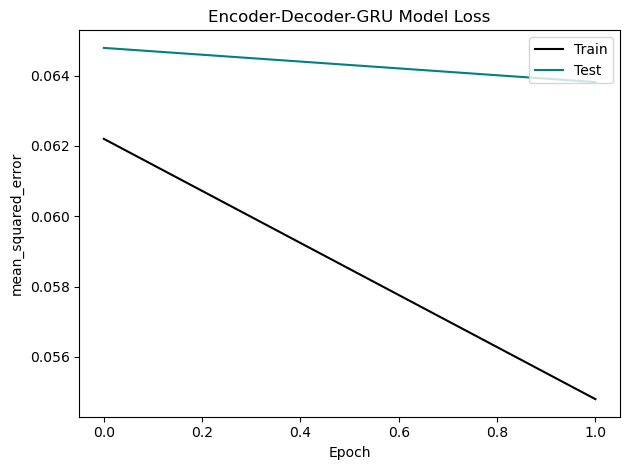

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_40 (GRU)                (None, 5, 25)             2100      
                                                                 
 gru_41 (GRU)                (None, 5)                 480       
                                                                 
 repeat_vector_15 (RepeatVec  (None, 10, 5)            0         
 tor)                                                            
                                                                 
 gru_42 (GRU)                (None, 10, 5)             180       
                                                                 
 gru_43 (GRU)                (None, 10, 1)             24        
                                                                 
 time_distributed_15 (TimeDi  (None, 10, 1)            2         
 stributed)                                          

In [27]:
predictor12 = OptimizePureUni(steps_past=5, steps_future=10, data=data, scale='minmax')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (25, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')},
            {'layer0': (100, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')},
            {'layer0': (200, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (1, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 2)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_encdec_gru(*args, **kwargs)

create_fit_model(predictor12, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor12.show_performance()
predictor12.predict(data.tail(5))
predictor12.model_blueprint()

In [28]:
#predictor12.save_model()

In [29]:
load = OptimizePureUni(steps_past =  5, steps_future = 10)

In [30]:
load.set_model_id('Loaded Model')

In [31]:
load.load_model('univarpure')

In [32]:
load.predict(data.tail(5))

,Loaded Model
0,0.808988
1,0.763486
2,0.734347
3,0.726982
4,0.725365
5,0.725029
6,0.724961
7,0.724947
8,0.724944
9,0.724943


### HybridUni

In [33]:
from imbrium.predictors.univarhybrid import HybridUni, OptimizeHybridUni

Epoch 1/10
516/516 [==============================] - 5s 5ms/step - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 2/10
516/516 [==============================] - 2s 5ms/step - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 3/10
516/516 [==============================] - 3s 5ms/step - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0217 - val_mean_squared_error: 0.0217
Epoch 4/10
516/516 [==============================] - 2s 5ms/step - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 5/10
516/516 [==============================] - 2s 4ms/step - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 6/10
516/516 [==============================] - 3s 6ms/step - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 7/10
516/516 [========

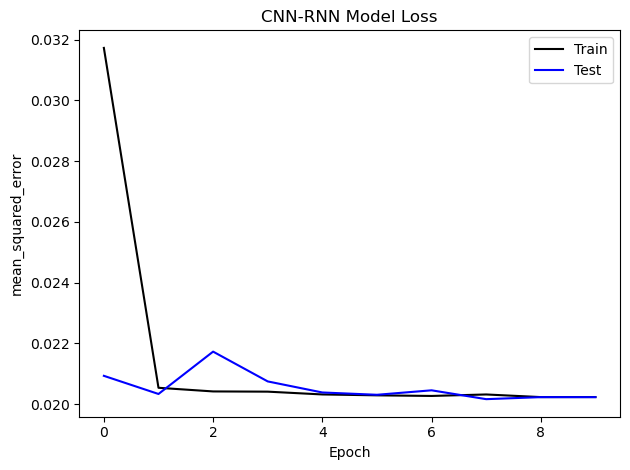

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_16 (TimeDi  (None, None, 5, 8)       16        
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, None, 5, 4)       36        
 stributed)                                                      
                                                                 
 time_distributed_18 (TimeDi  (None, None, 2, 4)       0         
 stributed)                                                      
                                                                 
 time_distributed_19 (TimeDi  (None, None, 8)          0         
 stributed)                                                      
                                                                 
 simple_rnn_42 (SimpleRNN)   (None, None, 25)        

In [34]:
predictor1 = HybridUni(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'maxabs')
predictor1.create_cnnrnn(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                         layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2),
                                         'layer3': (25, 'relu'), 'layer4': (10, 'relu')
                                        }
                        )
predictor1.fit_model(epochs = 10, show_progress= 1, validation_split = 0.20)
predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

[I 2023-03-09 00:38:53,455] A new study created in memory with name: no-name-e1c0f78e-727e-452e-aa37-9cd6442c5c3f
[I 2023-03-09 00:39:00,955] Trial 0 finished with value: 0.020704859867691994 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (25, 'relu'), 'layer4': (10, 'relu')}}. Best is trial 0 with value: 0.020704859867691994.
[I 2023-03-09 00:39:09,769] Trial 1 finished with value: 0.02000056393444538 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': 2, 'layer3': (25, 'relu'), 'layer4': (10, 'relu')}}. Best is trial 1 with value: 0.02000056393444538.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': 2, 'layer3': (25, 'relu'), 'layer4': (10, 'relu')}}
Best result: 0.02000056393444538


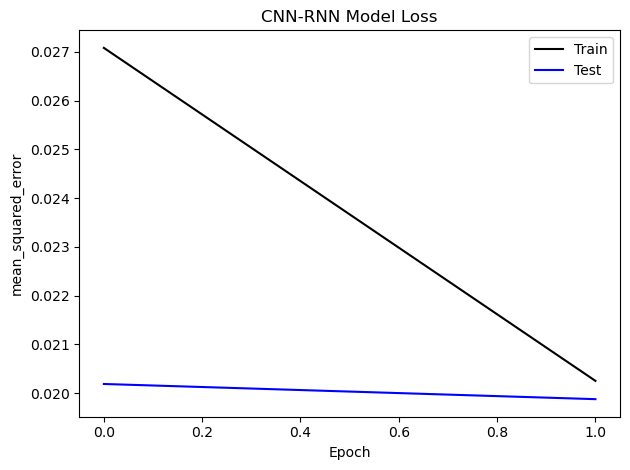

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_28 (TimeDi  (None, None, 5, 32)      64        
 stributed)                                                      
                                                                 
 time_distributed_29 (TimeDi  (None, None, 5, 16)      528       
 stributed)                                                      
                                                                 
 time_distributed_30 (TimeDi  (None, None, 2, 16)      0         
 stributed)                                                      
                                                                 
 time_distributed_31 (TimeDi  (None, None, 32)         0         
 stributed)                                                      
                                                                 
 simple_rnn_48 (SimpleRNN)   (None, None, 25)        

In [35]:
predictor1 = OptimizeHybridUni(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'maxabs')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2),'layer3': (25, 'relu'), 'layer4': (10, 'relu')},
            {'layer0': (16, 1, 'relu'), 'layer1': (8, 1, 'relu'), 'layer2': (2),'layer3': (55, 'relu'), 'layer4': (10, 'relu')},
            {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': (2),'layer3': (25, 'relu'), 'layer4': (10, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 2)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_cnnrnn(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

Epoch 1/7
516/516 [==============================] - 9s 11ms/step - loss: 0.4823 - mean_squared_error: 0.4823 - val_loss: 0.3781 - val_mean_squared_error: 0.3781
Epoch 2/7
516/516 [==============================] - 3s 6ms/step - loss: 0.3748 - mean_squared_error: 0.3748 - val_loss: 0.3838 - val_mean_squared_error: 0.3838
Epoch 2: early stopping


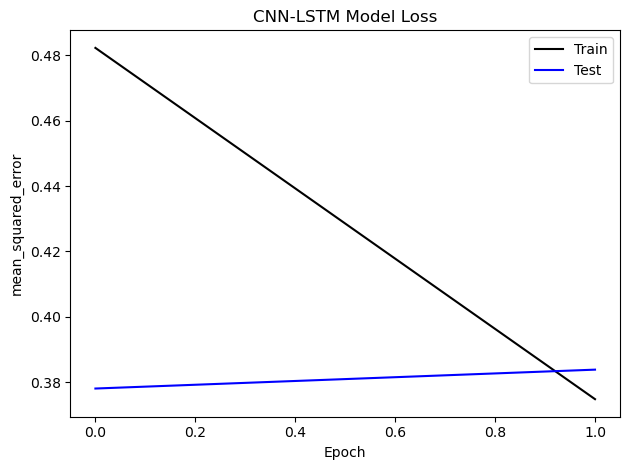

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_32 (TimeDi  (None, None, 5, 8)       16        
 stributed)                                                      
                                                                 
 time_distributed_33 (TimeDi  (None, None, 5, 4)       36        
 stributed)                                                      
                                                                 
 time_distributed_34 (TimeDi  (None, None, 2, 4)       0         
 stributed)                                                      
                                                                 
 time_distributed_35 (TimeDi  (None, None, 8)          0         
 stributed)                                                      
                                                                 
 lstm_36 (LSTM)              (None, None, 25)        

In [36]:
predictor1 = HybridUni(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'standard')
predictor1.create_cnnlstm(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                          layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2),
                                          'layer3': (25, 'relu'), 'layer4': (10, 'relu')
                                         }
                         )
predictor1.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

[I 2023-03-09 00:39:33,618] A new study created in memory with name: no-name-a2ef0428-c59b-4c42-8185-041357fb4531
[I 2023-03-09 00:39:43,223] Trial 0 finished with value: 0.05167494714260101 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': 2, 'layer3': (25, 'relu'), 'layer4': (10, 'relu')}}. Best is trial 0 with value: 0.05167494714260101.
[I 2023-03-09 00:39:52,261] Trial 1 finished with value: 0.05083382502198219 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': 2, 'layer3': (25, 'relu'), 'layer4': (10, 'relu')}}. Best is trial 1 with value: 0.05083382502198219.


Best hyperparameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': 2, 'layer3': (25, 'relu'), 'layer4': (10, 'relu')}}
Best result: 0.05083382502198219


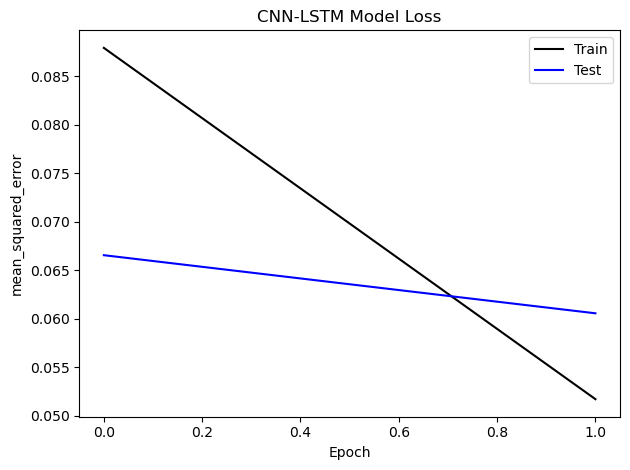

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_44 (TimeDi  (None, None, 5, 32)      64        
 stributed)                                                      
                                                                 
 time_distributed_45 (TimeDi  (None, None, 5, 16)      528       
 stributed)                                                      
                                                                 
 time_distributed_46 (TimeDi  (None, None, 2, 16)      0         
 stributed)                                                      
                                                                 
 time_distributed_47 (TimeDi  (None, None, 32)         0         
 stributed)                                                      
                                                                 
 lstm_42 (LSTM)              (None, None, 25)        

In [37]:
predictor1 = OptimizeHybridUni(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'maxabs')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2),'layer3': (25, 'relu'), 'layer4': (10, 'relu')},
            {'layer0': (16, 1, 'relu'), 'layer1': (8, 1, 'relu'), 'layer2': (2),'layer3': (55, 'relu'), 'layer4': (10, 'relu')},
            {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': (2),'layer3': (25, 'relu'), 'layer4': (10, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 2)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_cnnlstm(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

Epoch 1/2
516/516 [==============================] - 6s 7ms/step - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 2/2
516/516 [==============================] - 3s 6ms/step - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0227 - val_mean_squared_error: 0.0227


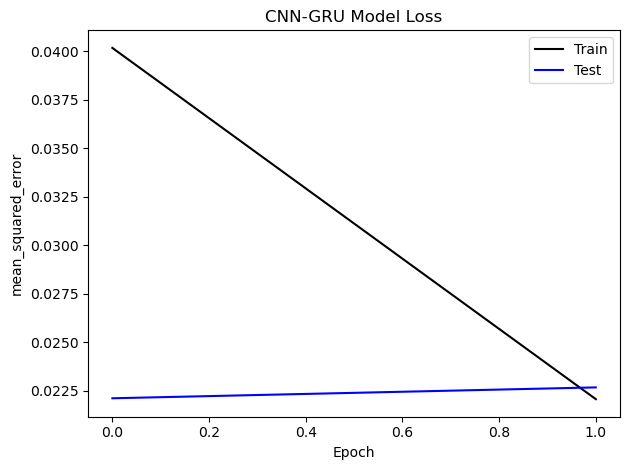

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_48 (TimeDi  (None, None, 5, 8)       16        
 stributed)                                                      
                                                                 
 time_distributed_49 (TimeDi  (None, None, 5, 4)       36        
 stributed)                                                      
                                                                 
 time_distributed_50 (TimeDi  (None, None, 2, 4)       0         
 stributed)                                                      
                                                                 
 time_distributed_51 (TimeDi  (None, None, 8)          0         
 stributed)                                                      
                                                                 
 gru_44 (GRU)                (None, None, 25)        

In [38]:
predictor1 = HybridUni(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'minmax')
predictor1.create_cnngru(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                         layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2),
                                         'layer3': (25, 'relu'), 'layer4': (10, 'relu')
                                        }
                        )
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

[I 2023-03-09 00:40:14,011] A new study created in memory with name: no-name-59ff1fd5-41f2-46e7-9276-7381f3d354f5
[I 2023-03-09 00:40:24,407] Trial 0 finished with value: 0.04858978092670441 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (16, 1, 'relu'), 'layer1': (8, 1, 'relu'), 'layer2': 2, 'layer3': (55, 'relu'), 'layer4': (10, 'relu')}}. Best is trial 0 with value: 0.04858978092670441.
[I 2023-03-09 00:40:33,505] Trial 1 finished with value: 0.049125947058200836 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': 2, 'layer3': (25, 'relu'), 'layer4': (10, 'relu')}}. Best is trial 0 with value: 0.04858978092670441.


Best hyperparameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (16, 1, 'relu'), 'layer1': (8, 1, 'relu'), 'layer2': 2, 'layer3': (55, 'relu'), 'layer4': (10, 'relu')}}
Best result: 0.04858978092670441


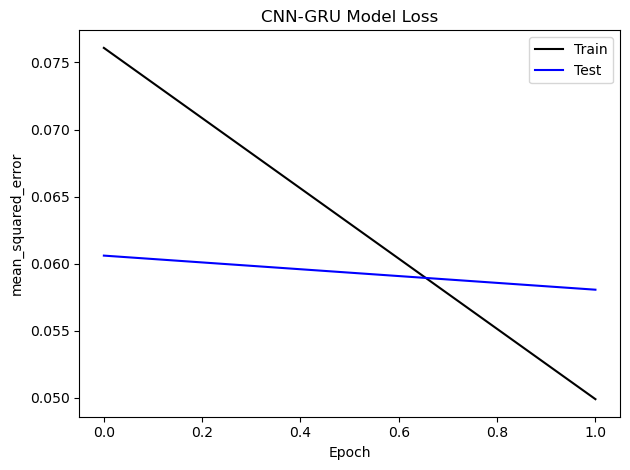

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_60 (TimeDi  (None, None, 5, 16)      32        
 stributed)                                                      
                                                                 
 time_distributed_61 (TimeDi  (None, None, 5, 8)       136       
 stributed)                                                      
                                                                 
 time_distributed_62 (TimeDi  (None, None, 2, 8)       0         
 stributed)                                                      
                                                                 
 time_distributed_63 (TimeDi  (None, None, 16)         0         
 stributed)                                                      
                                                                 
 gru_50 (GRU)                (None, None, 55)        

In [39]:
predictor1 = OptimizeHybridUni(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'maxabs')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2),'layer3': (25, 'relu'), 'layer4': (10, 'relu')},
            {'layer0': (16, 1, 'relu'), 'layer1': (8, 1, 'relu'), 'layer2': (2),'layer3': (55, 'relu'), 'layer4': (10, 'relu')},
            {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': (2),'layer3': (25, 'relu'), 'layer4': (10, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 2)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_cnngru(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

Epoch 1/2
516/516 [==============================] - 6s 7ms/step - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 2/2
516/516 [==============================] - 3s 5ms/step - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0217 - val_mean_squared_error: 0.0217


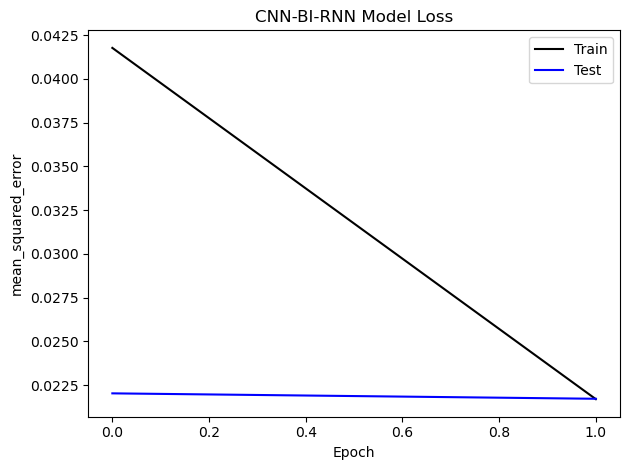

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_64 (TimeDi  (None, None, 5, 8)       16        
 stributed)                                                      
                                                                 
 time_distributed_65 (TimeDi  (None, None, 5, 4)       36        
 stributed)                                                      
                                                                 
 time_distributed_66 (TimeDi  (None, None, 2, 4)       0         
 stributed)                                                      
                                                                 
 time_distributed_67 (TimeDi  (None, None, 8)          0         
 stributed)                                                      
                                                                 
 bidirectional_12 (Bidirecti  (None, None, 50)       

In [40]:
predictor1 = HybridUni(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'normalize')
predictor1.create_cnnbirnn(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                           layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2),
                                           'layer3': (25, 'relu'), 'layer4': (10, 'relu')
                                          }
                          )
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

[I 2023-03-09 00:40:53,369] A new study created in memory with name: no-name-bb0bcd47-8c3f-4eb3-804a-6ca9f5a0f64d
[I 2023-03-09 00:41:01,200] Trial 0 finished with value: 0.020580774173140526 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (25, 'relu'), 'layer4': (10, 'relu')}}. Best is trial 0 with value: 0.020580774173140526.
[I 2023-03-09 00:41:09,698] Trial 1 finished with value: 0.02059558779001236 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': 2, 'layer3': (25, 'relu'), 'layer4': (10, 'relu')}}. Best is trial 0 with value: 0.020580774173140526.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (25, 'relu'), 'layer4': (10, 'relu')}}
Best result: 0.020580774173140526


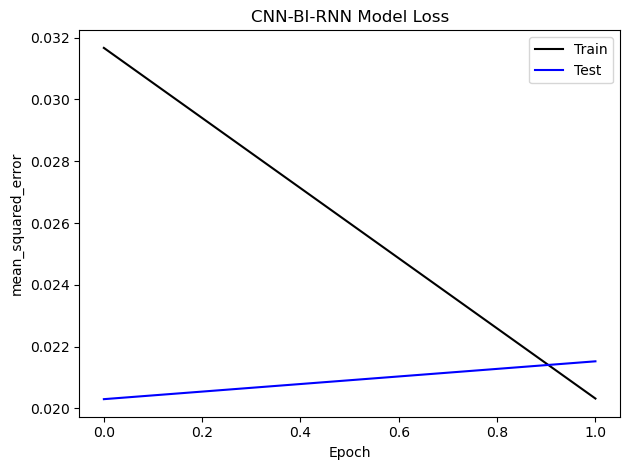

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_76 (TimeDi  (None, None, 5, 8)       16        
 stributed)                                                      
                                                                 
 time_distributed_77 (TimeDi  (None, None, 5, 4)       36        
 stributed)                                                      
                                                                 
 time_distributed_78 (TimeDi  (None, None, 2, 4)       0         
 stributed)                                                      
                                                                 
 time_distributed_79 (TimeDi  (None, None, 8)          0         
 stributed)                                                      
                                                                 
 bidirectional_15 (Bidirecti  (None, None, 50)       

In [41]:
predictor1 = OptimizeHybridUni(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'maxabs')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2),'layer3': (25, 'relu'), 'layer4': (10, 'relu')},
            {'layer0': (16, 1, 'relu'), 'layer1': (8, 1, 'relu'), 'layer2': (2),'layer3': (55, 'relu'), 'layer4': (10, 'relu')},
            {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': (2),'layer3': (25, 'relu'), 'layer4': (10, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 2)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_cnnbirnn(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

Epoch 1/2
516/516 [==============================] - 10s 9ms/step - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 2/2
516/516 [==============================] - 4s 8ms/step - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0231 - val_mean_squared_error: 0.0231


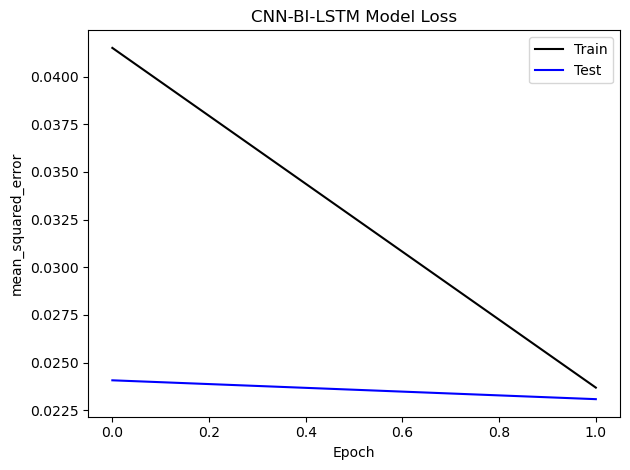

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_80 (TimeDi  (None, None, 5, 8)       16        
 stributed)                                                      
                                                                 
 time_distributed_81 (TimeDi  (None, None, 5, 4)       36        
 stributed)                                                      
                                                                 
 time_distributed_82 (TimeDi  (None, None, 2, 4)       0         
 stributed)                                                      
                                                                 
 time_distributed_83 (TimeDi  (None, None, 8)          0         
 stributed)                                                      
                                                                 
 bidirectional_16 (Bidirecti  (None, None, 50)       

In [42]:
predictor1 = HybridUni(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'normalize')
predictor1.create_cnnbilstm(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                            layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2),
                                            'layer3': (25, 'relu'), 'layer4': (10, 'relu')
                                           }
                           )
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

[I 2023-03-09 00:41:34,086] A new study created in memory with name: no-name-72bbb8d1-94d6-483b-acba-1924e1473588
[I 2023-03-09 00:41:45,864] Trial 0 finished with value: 0.05183869227766991 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (25, 'relu'), 'layer4': (10, 'relu')}}. Best is trial 0 with value: 0.05183869227766991.
[I 2023-03-09 00:41:58,460] Trial 1 finished with value: 0.02148045226931572 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': 2, 'layer3': (25, 'relu'), 'layer4': (10, 'relu')}}. Best is trial 1 with value: 0.02148045226931572.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': 2, 'layer3': (25, 'relu'), 'layer4': (10, 'relu')}}
Best result: 0.02148045226931572


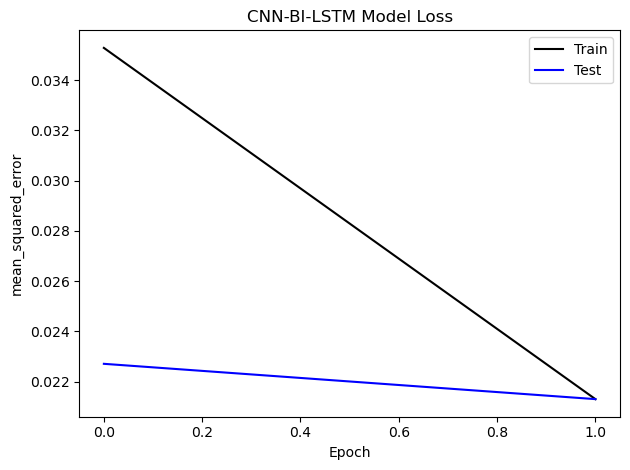

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_92 (TimeDi  (None, None, 5, 32)      64        
 stributed)                                                      
                                                                 
 time_distributed_93 (TimeDi  (None, None, 5, 16)      528       
 stributed)                                                      
                                                                 
 time_distributed_94 (TimeDi  (None, None, 2, 16)      0         
 stributed)                                                      
                                                                 
 time_distributed_95 (TimeDi  (None, None, 32)         0         
 stributed)                                                      
                                                                 
 bidirectional_19 (Bidirecti  (None, None, 50)       

In [43]:
predictor1 = OptimizeHybridUni(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'maxabs')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2),'layer3': (25, 'relu'), 'layer4': (10, 'relu')},
            {'layer0': (16, 1, 'relu'), 'layer1': (8, 1, 'relu'), 'layer2': (2),'layer3': (55, 'relu'), 'layer4': (10, 'relu')},
            {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': (2),'layer3': (25, 'relu'), 'layer4': (10, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 2)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_cnnbilstm(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

Epoch 1/7
516/516 [==============================] - 10s 9ms/step - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 2/7
516/516 [==============================] - 4s 8ms/step - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0217 - val_mean_squared_error: 0.0217
Epoch 3/7
516/516 [==============================] - 4s 8ms/step - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 4/7
516/516 [==============================] - 5s 10ms/step - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 4: early stopping


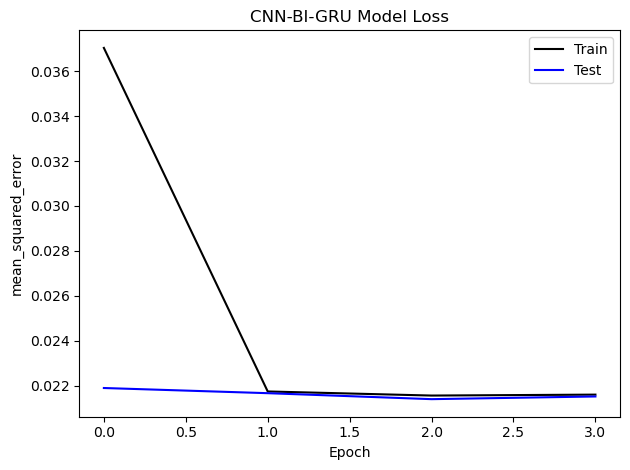

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_96 (TimeDi  (None, None, 5, 8)       16        
 stributed)                                                      
                                                                 
 time_distributed_97 (TimeDi  (None, None, 5, 4)       36        
 stributed)                                                      
                                                                 
 time_distributed_98 (TimeDi  (None, None, 2, 4)       0         
 stributed)                                                      
                                                                 
 time_distributed_99 (TimeDi  (None, None, 8)          0         
 stributed)                                                      
                                                                 
 bidirectional_20 (Bidirecti  (None, None, 50)       

In [44]:
predictor1 = HybridUni(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'normalize')
predictor1.create_cnnbigru(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                           layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2),
                                           'layer3': (25, 'relu'), 'layer4': (10, 'relu')
                                          }
                          )
predictor1.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

[I 2023-03-09 00:42:36,908] A new study created in memory with name: no-name-6db70787-ed7d-42fb-995c-5ef0f0577f04
[I 2023-03-09 00:42:56,457] Trial 0 finished with value: 0.020689677447080612 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': 2, 'layer3': (25, 'relu'), 'layer4': (10, 'relu')}}. Best is trial 0 with value: 0.020689677447080612.
[I 2023-03-09 00:43:09,165] Trial 1 finished with value: 0.020564427599310875 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': 2, 'layer3': (25, 'relu'), 'layer4': (10, 'relu')}}. Best is trial 1 with value: 0.020564427599310875.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': 2, 'layer3': (25, 'relu'), 'layer4': (10, 'relu')}}
Best result: 0.020564427599310875


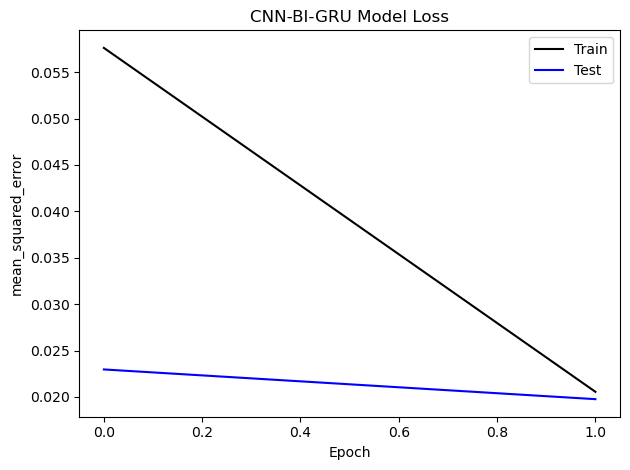

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_108 (TimeD  (None, None, 5, 32)      64        
 istributed)                                                     
                                                                 
 time_distributed_109 (TimeD  (None, None, 5, 16)      528       
 istributed)                                                     
                                                                 
 time_distributed_110 (TimeD  (None, None, 2, 16)      0         
 istributed)                                                     
                                                                 
 time_distributed_111 (TimeD  (None, None, 32)         0         
 istributed)                                                     
                                                                 
 bidirectional_23 (Bidirecti  (None, None, 50)       

In [45]:
predictor1 = OptimizeHybridUni(sub_seq = 2, steps_past = 10, steps_future = 5, data = data, scale = 'maxabs')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2),'layer3': (25, 'relu'), 'layer4': (10, 'relu')},
            {'layer0': (16, 1, 'relu'), 'layer1': (8, 1, 'relu'), 'layer2': (2),'layer3': (55, 'relu'), 'layer4': (10, 'relu')},
            {'layer0': (32, 1, 'relu'), 'layer1': (16, 1, 'relu'), 'layer2': (2),'layer3': (25, 'relu'), 'layer4': (10, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 2)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_cnnbigru(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=0, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )

predictor1.show_performance()
predictor1.predict(data.tail(10))
predictor1.model_blueprint()

In [46]:
#predictor1.save_model()

In [47]:
load = HybridUni(sub_seq = 2, steps_past =  10, steps_future = 5)

In [48]:
load.set_model_id('Loaded Model')

In [49]:
load.load_model('univarhybrid')

In [50]:
load.predict(data.tail(10))

,Loaded Model
0,0.840170
1,0.854234
2,0.845856
3,0.817616
4,0.824379


## MultiVarMultiStep

In [51]:
from imbrium.predictors.multivarpure import OptimizePureMulti, PureMulti
from imbrium.utils.optimization import seeker

In [52]:
import pandas as pd
data = pd.read_csv('example_dataset/CaliforniaHousing.csv')

Epoch 1/7
516/516 [==============================] - 2s 2ms/step - loss: 2.9825 - mean_squared_error: 2.9825 - val_loss: 0.5487 - val_mean_squared_error: 0.5487
Epoch 2/7
516/516 [==============================] - 1s 3ms/step - loss: 0.5234 - mean_squared_error: 0.5234 - val_loss: 0.4854 - val_mean_squared_error: 0.4854
Epoch 3/7
516/516 [==============================] - 2s 3ms/step - loss: 0.4999 - mean_squared_error: 0.4999 - val_loss: 0.4777 - val_mean_squared_error: 0.4777
Epoch 4/7
516/516 [==============================] - 2s 3ms/step - loss: 0.4867 - mean_squared_error: 0.4867 - val_loss: 0.4711 - val_mean_squared_error: 0.4711
Epoch 5/7
516/516 [==============================] - 1s 3ms/step - loss: 0.4807 - mean_squared_error: 0.4807 - val_loss: 0.4877 - val_mean_squared_error: 0.4877
Epoch 5: early stopping


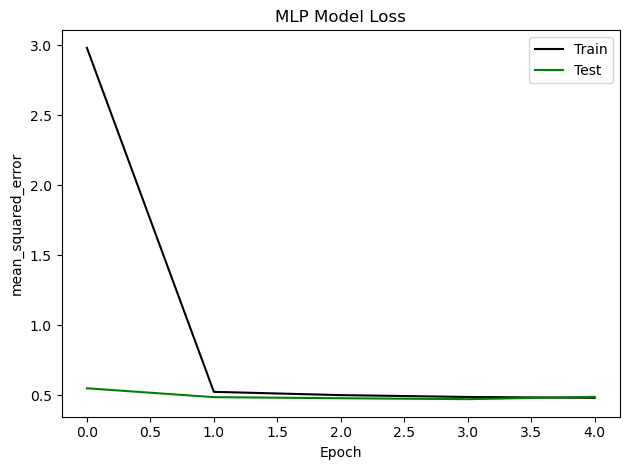

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 5)                 105       
                                                                 
 dense_95 (Dense)            (None, 5)                 30        
                                                                 
 dense_96 (Dense)            (None, 5)                 30        
                                                                 
 dense_97 (Dense)            (None, 10)                60        
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [53]:
predictor1 = PureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = '')
#predictor1.get_X_input
predictor1.create_mlp(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                      layer_config = {'layer0': (5, 'relu'), 'layer1': (5,'relu'), 'layer2': (5, 'relu')}
                     )
predictor1.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

[I 2023-03-09 00:43:36,008] A new study created in memory with name: no-name-6d174e75-fdd4-4c8f-b912-991b1f602c2c


Epoch 1/2
516/516 [==============================] - 2s 2ms/step - loss: 4.4869 - mean_squared_error: 4.4869 - val_loss: 2.2754 - val_mean_squared_error: 2.2754
Epoch 2/2
516/516 [==============================] - 1s 2ms/step - loss: 1.0160 - mean_squared_error: 1.0160 - val_loss: 0.5665 - val_mean_squared_error: 0.5665


[I 2023-03-09 00:43:39,176] Trial 0 finished with value: 1.015970230102539 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu'), 'layer2': (5, 'relu')}}. Best is trial 0 with value: 1.015970230102539.


Epoch 1/2
516/516 [==============================] - 1s 2ms/step - loss: 3.2906 - mean_squared_error: 3.2906 - val_loss: 2.3780 - val_mean_squared_error: 2.3780
Epoch 2/2
516/516 [==============================] - 1s 2ms/step - loss: 1.5065 - mean_squared_error: 1.5065 - val_loss: 1.7003 - val_mean_squared_error: 1.7003


[I 2023-03-09 00:43:41,646] Trial 1 finished with value: 1.5065076351165771 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu'), 'layer2': (5, 'relu')}}. Best is trial 0 with value: 1.015970230102539.


Epoch 1/2
516/516 [==============================] - 3s 2ms/step - loss: 4.4912 - mean_squared_error: 4.4912 - val_loss: 4.6299 - val_mean_squared_error: 4.6299
Epoch 2/2
516/516 [==============================] - 1s 2ms/step - loss: 3.0627 - mean_squared_error: 3.0627 - val_loss: 3.3145 - val_mean_squared_error: 3.3145


[I 2023-03-09 00:43:45,828] Trial 2 finished with value: 3.0627033710479736 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (2, 'relu'), 'layer1': (5, 'relu'), 'layer2': (2, 'relu')}}. Best is trial 0 with value: 1.015970230102539.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu'), 'layer2': (5, 'relu')}}
Best result: 1.015970230102539
Epoch 1/2
516/516 [==============================] - 2s 2ms/step - loss: 13.7446 - mean_squared_error: 13.7446 - val_loss: 1.5182 - val_mean_squared_error: 1.5182
Epoch 2/2
516/516 [==============================] - 1s 2ms/step - loss: 1.0290 - mean_squared_error: 1.0290 - val_loss: 0.8450 - val_mean_squared_error: 0.8450


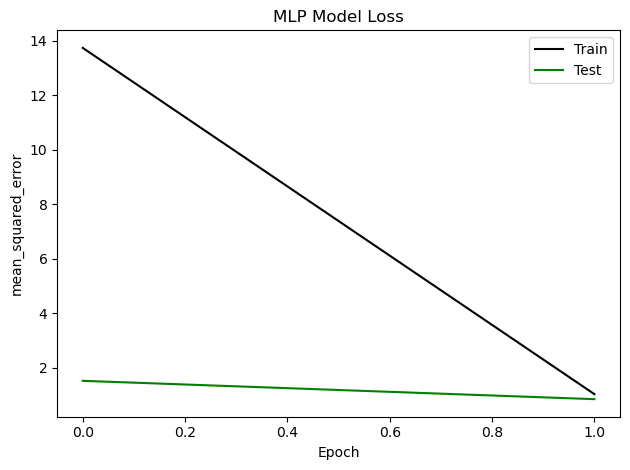

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 5)                 105       
                                                                 
 dense_111 (Dense)           (None, 10)                60        
                                                                 
 dense_112 (Dense)           (None, 5)                 55        
                                                                 
 dense_113 (Dense)           (None, 10)                60        
                                                                 
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________


In [54]:
predictor1 = OptimizePureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = '')

@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (5, 'relu'), 'layer1': (10,'relu'), 'layer2': (5, 'relu')},
            {'layer0': (2, 'relu'), 'layer1': (5, 'relu'), 'layer2': (2, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_mlp(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/10
516/516 [==============================] - 6s 7ms/step - loss: 2.1387 - mean_squared_error: 2.1387 - val_loss: 1.1668 - val_mean_squared_error: 1.1668
Epoch 2/10
516/516 [==============================] - 3s 6ms/step - loss: 0.7215 - mean_squared_error: 0.7215 - val_loss: 0.5592 - val_mean_squared_error: 0.5592
Epoch 3/10
516/516 [==============================] - 3s 6ms/step - loss: 0.5754 - mean_squared_error: 0.5754 - val_loss: 0.5422 - val_mean_squared_error: 0.5422
Epoch 4/10
516/516 [==============================] - 3s 6ms/step - loss: 0.5631 - mean_squared_error: 0.5631 - val_loss: 0.5596 - val_mean_squared_error: 0.5596
Epoch 5/10
516/516 [==============================] - 3s 6ms/step - loss: 0.5549 - mean_squared_error: 0.5549 - val_loss: 0.5302 - val_mean_squared_error: 0.5302
Epoch 6/10
516/516 [==============================] - 3s 6ms/step - loss: 0.5449 - mean_squared_error: 0.5449 - val_loss: 0.5536 - val_mean_squared_error: 0.5536
Epoch 7/10
516/516 [========

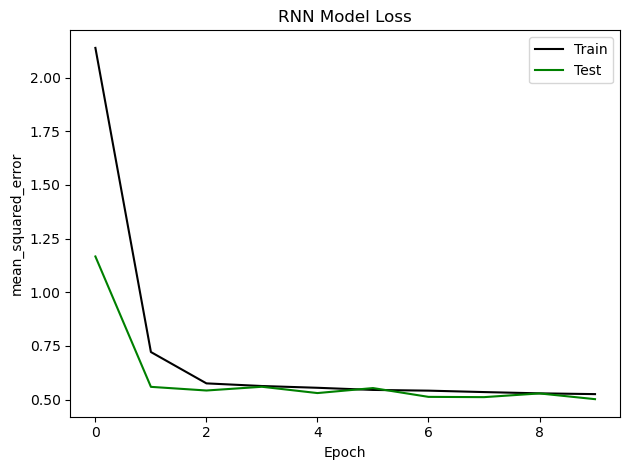

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_58 (SimpleRNN)   (None, 5, 5)              50        
                                                                 
 simple_rnn_59 (SimpleRNN)   (None, 5, 5)              55        
                                                                 
 simple_rnn_60 (SimpleRNN)   (None, 5)                 55        
                                                                 
 dense_114 (Dense)           (None, 10)                60        
                                                                 
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________


In [55]:
predictor1 = PureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_rnn(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (5, 'relu'), 'layer1': (5,'relu'), 'layer2': (5, 'relu')})
predictor1.fit_model(epochs = 10, show_progress= 1, validation_split = 0.20)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

[I 2023-03-09 00:44:24,140] A new study created in memory with name: no-name-7f2c66ed-3e0f-4664-8120-68b5b20deada


Epoch 1/2
516/516 [==============================] - 5s 6ms/step - loss: 2.1357 - mean_squared_error: 2.1357 - val_loss: 1.4757 - val_mean_squared_error: 1.4757
Epoch 2/2
516/516 [==============================] - 3s 6ms/step - loss: 1.2934 - mean_squared_error: 1.2934 - val_loss: 1.4584 - val_mean_squared_error: 1.4584


[I 2023-03-09 00:44:32,368] Trial 0 finished with value: 1.2933622598648071 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (2, 'relu'), 'layer1': (5, 'relu'), 'layer2': (2, 'relu')}}. Best is trial 0 with value: 1.2933622598648071.


Epoch 1/2
516/516 [==============================] - 5s 6ms/step - loss: 1.6441 - mean_squared_error: 1.6441 - val_loss: 1.4715 - val_mean_squared_error: 1.4715
Epoch 2/2
516/516 [==============================] - 3s 6ms/step - loss: 1.2513 - mean_squared_error: 1.2513 - val_loss: 1.7489 - val_mean_squared_error: 1.7489


[I 2023-03-09 00:44:40,768] Trial 1 finished with value: 1.2513481378555298 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (2, 'relu'), 'layer1': (5, 'relu'), 'layer2': (2, 'relu')}}. Best is trial 1 with value: 1.2513481378555298.


Epoch 1/2
516/516 [==============================] - 5s 6ms/step - loss: 1.4974 - mean_squared_error: 1.4974 - val_loss: 1.6261 - val_mean_squared_error: 1.6261
Epoch 2/2
516/516 [==============================] - 3s 6ms/step - loss: 1.2797 - mean_squared_error: 1.2797 - val_loss: 1.7192 - val_mean_squared_error: 1.7192


[I 2023-03-09 00:44:49,361] Trial 2 finished with value: 1.2796870470046997 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu'), 'layer2': (5, 'relu')}}. Best is trial 1 with value: 1.2513481378555298.


Best hyperparameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (2, 'relu'), 'layer1': (5, 'relu'), 'layer2': (2, 'relu')}}
Best result: 1.2513481378555298
Epoch 1/2
516/516 [==============================] - 6s 8ms/step - loss: 3.0140 - mean_squared_error: 3.0140 - val_loss: 2.3599 - val_mean_squared_error: 2.3599
Epoch 2/2
516/516 [==============================] - 4s 8ms/step - loss: 1.4822 - mean_squared_error: 1.4822 - val_loss: 1.6362 - val_mean_squared_error: 1.6362


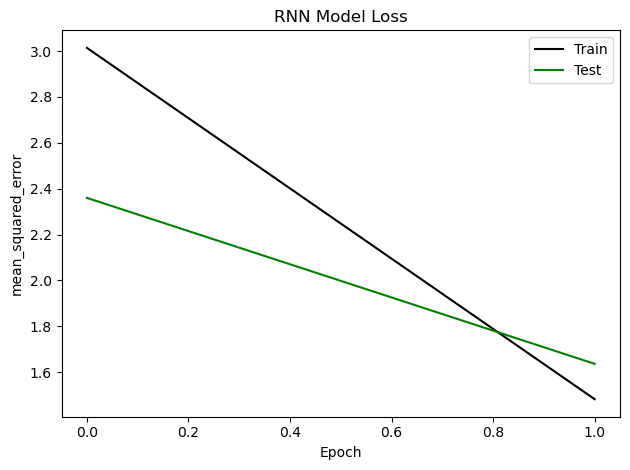

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_70 (SimpleRNN)   (None, 5, 2)              14        
                                                                 
 simple_rnn_71 (SimpleRNN)   (None, 5, 5)              40        
                                                                 
 simple_rnn_72 (SimpleRNN)   (None, 2)                 16        
                                                                 
 dense_118 (Dense)           (None, 10)                30        
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


In [56]:
predictor1 = OptimizePureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (5, 'relu'), 'layer1': (10,'relu'), 'layer2': (5, 'relu')},
            {'layer0': (2, 'relu'), 'layer1': (5, 'relu'), 'layer2': (2, 'relu')},
            {'layer0': (20, 'relu'), 'layer1': (50, 'relu'), 'layer2': (20, 'sigmoid')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_rnn(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/7
516/516 [==============================] - 11s 12ms/step - loss: 1.6397 - mean_squared_error: 1.6397 - val_loss: 0.5280 - val_mean_squared_error: 0.5280
Epoch 2/7
516/516 [==============================] - 5s 9ms/step - loss: 0.5221 - mean_squared_error: 0.5221 - val_loss: 0.4962 - val_mean_squared_error: 0.4962
Epoch 3/7
516/516 [==============================] - 5s 9ms/step - loss: 0.4928 - mean_squared_error: 0.4928 - val_loss: 0.4714 - val_mean_squared_error: 0.4714
Epoch 4/7
516/516 [==============================] - 6s 11ms/step - loss: 0.4784 - mean_squared_error: 0.4784 - val_loss: 0.4628 - val_mean_squared_error: 0.4628
Epoch 5/7
516/516 [==============================] - 7s 13ms/step - loss: 0.4678 - mean_squared_error: 0.4678 - val_loss: 0.4573 - val_mean_squared_error: 0.4573
Epoch 6/7
516/516 [==============================] - 7s 13ms/step - loss: 0.4632 - mean_squared_error: 0.4632 - val_loss: 0.4609 - val_mean_squared_error: 0.4609
Epoch 6: early stopping


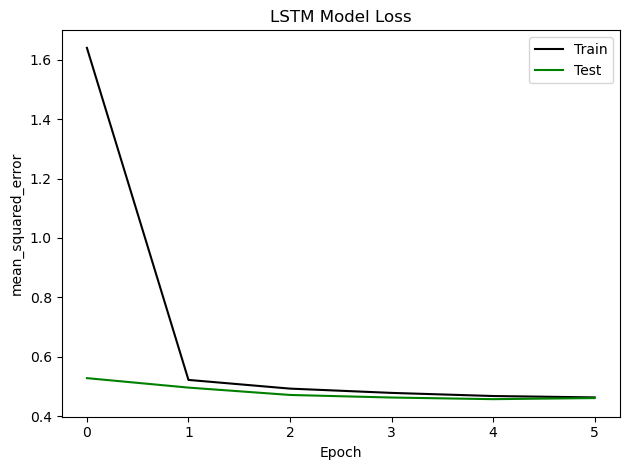

Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_52 (LSTM)              (None, 5, 5)              200       
                                                                 
 lstm_53 (LSTM)              (None, 5, 5)              220       
                                                                 
 lstm_54 (LSTM)              (None, 5)                 220       
                                                                 
 dense_119 (Dense)           (None, 10)                60        
                                                                 
Total params: 700
Trainable params: 700
Non-trainable params: 0
_________________________________________________________________


In [57]:
predictor1 = PureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'standard')
predictor1.create_lstm(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (5, 'relu'), 'layer1': (5,'relu'), 'layer2': (5, 'relu')})
predictor1.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

[I 2023-03-09 00:45:42,846] A new study created in memory with name: no-name-1c36dda0-a0f9-48d3-a7ba-2357545d5e98


Epoch 1/2
516/516 [==============================] - 15s 18ms/step - loss: 1.8024 - mean_squared_error: 1.8024 - val_loss: 1.5181 - val_mean_squared_error: 1.5181
Epoch 2/2
516/516 [==============================] - 8s 16ms/step - loss: 1.2888 - mean_squared_error: 1.2888 - val_loss: 1.5126 - val_mean_squared_error: 1.5126


[I 2023-03-09 00:46:06,266] Trial 0 finished with value: 1.288831114768982 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (20, 'relu'), 'layer1': (50, 'relu'), 'layer2': (20, 'sigmoid')}}. Best is trial 0 with value: 1.288831114768982.


Epoch 1/2
516/516 [==============================] - 13s 17ms/step - loss: 1.8333 - mean_squared_error: 1.8333 - val_loss: 1.5224 - val_mean_squared_error: 1.5224
Epoch 2/2
516/516 [==============================] - 8s 15ms/step - loss: 1.2888 - mean_squared_error: 1.2888 - val_loss: 1.5143 - val_mean_squared_error: 1.5143


[I 2023-03-09 00:46:30,978] Trial 1 finished with value: 1.2888022661209106 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (20, 'relu'), 'layer1': (50, 'relu'), 'layer2': (20, 'sigmoid')}}. Best is trial 1 with value: 1.2888022661209106.


Epoch 1/2
516/516 [==============================] - 11s 14ms/step - loss: 2.5904 - mean_squared_error: 2.5904 - val_loss: 1.3731 - val_mean_squared_error: 1.3731
Epoch 2/2
516/516 [==============================] - 5s 10ms/step - loss: 1.1005 - mean_squared_error: 1.1005 - val_loss: 1.0571 - val_mean_squared_error: 1.0571


[I 2023-03-09 00:46:47,588] Trial 2 finished with value: 1.1005316972732544 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu'), 'layer2': (5, 'relu')}}. Best is trial 2 with value: 1.1005316972732544.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (10, 'relu'), 'layer2': (5, 'relu')}}
Best result: 1.1005316972732544
Epoch 1/2
516/516 [==============================] - 12s 13ms/step - loss: 2.5913 - mean_squared_error: 2.5913 - val_loss: 1.4457 - val_mean_squared_error: 1.4457
Epoch 2/2
516/516 [==============================] - 6s 11ms/step - loss: 1.0699 - mean_squared_error: 1.0699 - val_loss: 0.9911 - val_mean_squared_error: 0.9911


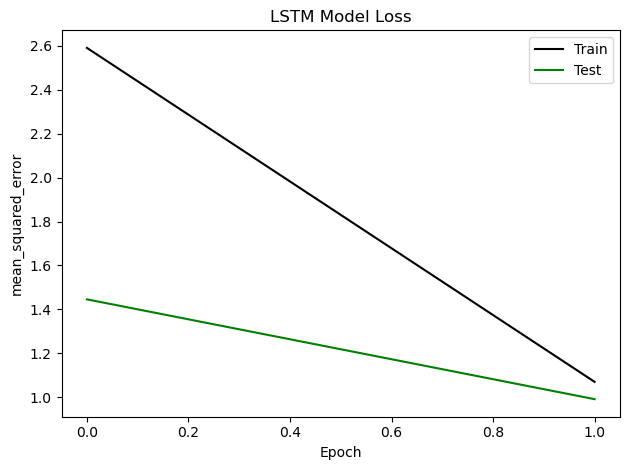

Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_64 (LSTM)              (None, 5, 5)              200       
                                                                 
 lstm_65 (LSTM)              (None, 5, 10)             640       
                                                                 
 lstm_66 (LSTM)              (None, 5)                 320       
                                                                 
 dense_123 (Dense)           (None, 10)                60        
                                                                 
Total params: 1,220
Trainable params: 1,220
Non-trainable params: 0
_________________________________________________________________


In [58]:
predictor1 = OptimizePureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (5, 'relu'), 'layer1': (10,'relu'), 'layer2': (5, 'relu')},
            {'layer0': (2, 'relu'), 'layer1': (5, 'relu'), 'layer2': (2, 'relu')},
            {'layer0': (20, 'relu'), 'layer1': (50, 'relu'), 'layer2': (20, 'sigmoid')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_lstm(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/2
516/516 [==============================] - 4s 5ms/step - loss: 0.8213 - mean_squared_error: 0.8213 - val_loss: 0.5407 - val_mean_squared_error: 0.5407
Epoch 2/2
516/516 [==============================] - 2s 4ms/step - loss: 0.5461 - mean_squared_error: 0.5461 - val_loss: 0.5461 - val_mean_squared_error: 0.5461


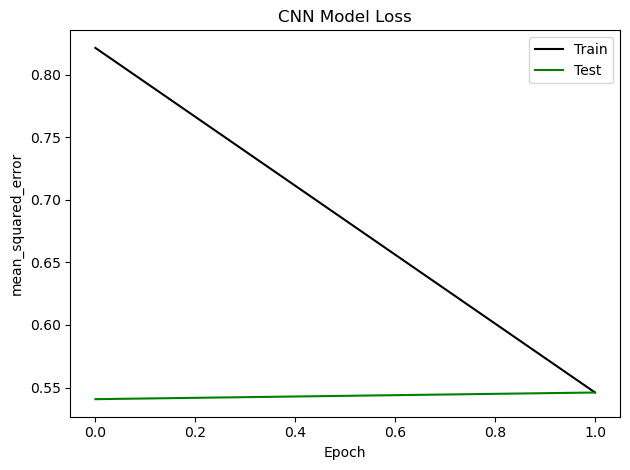

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_64 (Conv1D)          (None, 5, 64)             320       
                                                                 
 conv1d_65 (Conv1D)          (None, 5, 32)             2080      
                                                                 
 max_pooling1d_32 (MaxPoolin  (None, 2, 32)            0         
 g1D)                                                            
                                                                 
 flatten_32 (Flatten)        (None, 64)                0         
                                                                 
 dense_124 (Dense)           (None, 50)                3250      
                                                                 
 dense_125 (Dense)           (None, 10)                510       
                                                     

In [59]:
predictor1 = PureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'minmax')
predictor1.create_cnn(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                      layer_config = {'layer0': (64, 1, 'relu'), 'layer1': (32, 1, 'relu'), 'layer2': (2), 'layer3': (50, 'relu')})
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

[I 2023-03-09 00:47:13,881] A new study created in memory with name: no-name-74842239-1922-45a3-bd17-b6ded1ab16d5


Epoch 1/2
516/516 [==============================] - 2s 3ms/step - loss: 1.6179 - mean_squared_error: 1.6179 - val_loss: 1.5020 - val_mean_squared_error: 1.5020
Epoch 2/2
516/516 [==============================] - 2s 3ms/step - loss: 1.2665 - mean_squared_error: 1.2665 - val_loss: 1.5493 - val_mean_squared_error: 1.5493


[I 2023-03-09 00:47:17,541] Trial 0 finished with value: 1.26646888256073 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (14, 1, 'relu'), 'layer1': (32, 1, 'relu'), 'layer2': 2, 'layer3': (50, 'relu')}}. Best is trial 0 with value: 1.26646888256073.


Epoch 1/2
516/516 [==============================] - 4s 6ms/step - loss: 1.6392 - mean_squared_error: 1.6392 - val_loss: 1.5138 - val_mean_squared_error: 1.5138
Epoch 2/2
516/516 [==============================] - 2s 5ms/step - loss: 1.2734 - mean_squared_error: 1.2734 - val_loss: 1.5187 - val_mean_squared_error: 1.5187


[I 2023-03-09 00:47:24,322] Trial 1 finished with value: 1.2733676433563232 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (64, 1, 'relu'), 'layer1': (32, 1, 'relu'), 'layer2': 2, 'layer3': (50, 'relu')}}. Best is trial 0 with value: 1.26646888256073.


Epoch 1/2
516/516 [==============================] - 3s 4ms/step - loss: 1.5485 - mean_squared_error: 1.5485 - val_loss: 1.3690 - val_mean_squared_error: 1.3690
Epoch 2/2
516/516 [==============================] - 2s 3ms/step - loss: 0.7866 - mean_squared_error: 0.7866 - val_loss: 0.5413 - val_mean_squared_error: 0.5413


[I 2023-03-09 00:47:29,309] Trial 2 finished with value: 0.786647617816925 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (14, 1, 'relu'), 'layer1': (32, 1, 'relu'), 'layer2': 2, 'layer3': (50, 'relu')}}. Best is trial 2 with value: 0.786647617816925.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (14, 1, 'relu'), 'layer1': (32, 1, 'relu'), 'layer2': 2, 'layer3': (50, 'relu')}}
Best result: 0.786647617816925
Epoch 1/2
516/516 [==============================] - 3s 4ms/step - loss: 1.5076 - mean_squared_error: 1.5076 - val_loss: 1.3166 - val_mean_squared_error: 1.3166
Epoch 2/2
516/516 [==============================] - 2s 3ms/step - loss: 0.6956 - mean_squared_error: 0.6956 - val_loss: 0.5747 - val_mean_squared_error: 0.5747


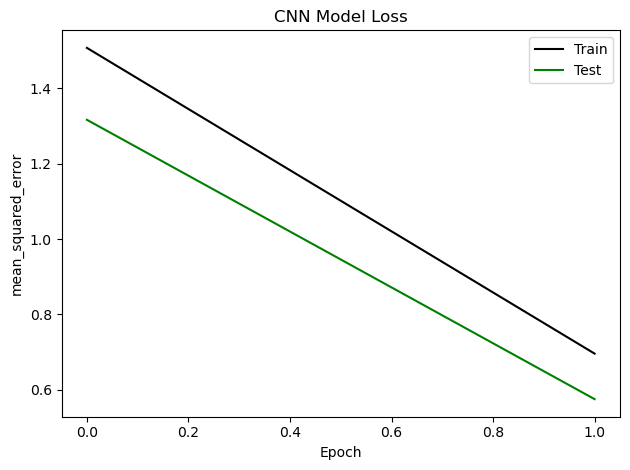

Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_72 (Conv1D)          (None, 5, 14)             70        
                                                                 
 conv1d_73 (Conv1D)          (None, 5, 32)             480       
                                                                 
 max_pooling1d_36 (MaxPoolin  (None, 2, 32)            0         
 g1D)                                                            
                                                                 
 flatten_36 (Flatten)        (None, 64)                0         
                                                                 
 dense_132 (Dense)           (None, 50)                3250      
                                                                 
 dense_133 (Dense)           (None, 10)                510       
                                                     

In [60]:
predictor1 = OptimizePureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (64, 1, 'relu'), 'layer1': (32, 1, 'relu'), 'layer2': (2), 'layer3': (50, 'relu')},
            {'layer0': (34, 1, 'relu'), 'layer1': (32, 1, 'relu'), 'layer2': (2), 'layer3': (50, 'relu')},
            {'layer0': (14, 1, 'relu'), 'layer1': (32, 1, 'relu'), 'layer2': (2), 'layer3': (50, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_cnn(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/2
516/516 [==============================] - 12s 12ms/step - loss: 1.8714 - mean_squared_error: 1.8714 - val_loss: 0.5511 - val_mean_squared_error: 0.5511
Epoch 2/2
516/516 [==============================] - 7s 13ms/step - loss: 0.5495 - mean_squared_error: 0.5495 - val_loss: 0.5162 - val_mean_squared_error: 0.5162


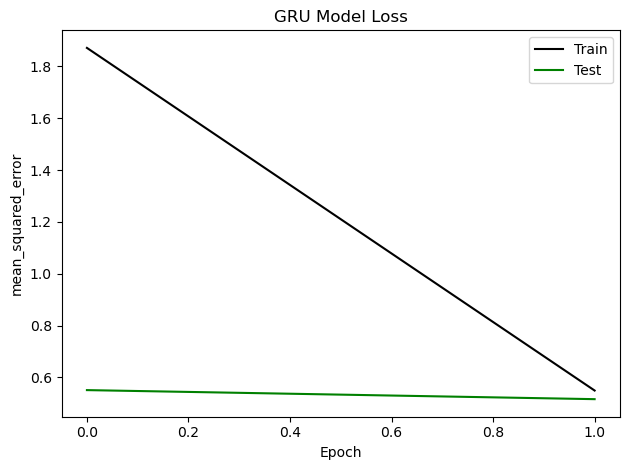

Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_60 (GRU)                (None, 5, 5)              165       
                                                                 
 gru_61 (GRU)                (None, 5, 5)              180       
                                                                 
 gru_62 (GRU)                (None, 5)                 180       
                                                                 
 dense_134 (Dense)           (None, 10)                60        
                                                                 
Total params: 585
Trainable params: 585
Non-trainable params: 0
_________________________________________________________________


In [61]:
predictor1 = PureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'maxabs')
predictor1.create_gru(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', 
                      layer_config = {'layer0': (5, 'relu'), 'layer1': (5,'relu'), 'layer2': (5, 'relu')}
                     )
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

[I 2023-03-09 00:47:54,211] A new study created in memory with name: no-name-de3bbf3a-afd2-4415-a1e9-6f8ab16437bc


Epoch 1/2
516/516 [==============================] - 13s 13ms/step - loss: 2.0359 - mean_squared_error: 2.0359 - val_loss: 1.4267 - val_mean_squared_error: 1.4267
Epoch 2/2
516/516 [==============================] - 7s 14ms/step - loss: 0.8952 - mean_squared_error: 0.8952 - val_loss: 0.6297 - val_mean_squared_error: 0.6297


[I 2023-03-09 00:48:14,239] Trial 0 finished with value: 0.8952085375785828 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu')}}. Best is trial 0 with value: 0.8952085375785828.


Epoch 1/2
516/516 [==============================] - 11s 14ms/step - loss: 1.8770 - mean_squared_error: 1.8770 - val_loss: 1.5360 - val_mean_squared_error: 1.5360
Epoch 2/2
516/516 [==============================] - 6s 12ms/step - loss: 1.2809 - mean_squared_error: 1.2809 - val_loss: 1.4815 - val_mean_squared_error: 1.4815


[I 2023-03-09 00:48:31,357] Trial 1 finished with value: 1.2809470891952515 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu')}}. Best is trial 0 with value: 0.8952085375785828.


Epoch 1/2
516/516 [==============================] - 12s 14ms/step - loss: 2.6494 - mean_squared_error: 2.6494 - val_loss: 1.4707 - val_mean_squared_error: 1.4707
Epoch 2/2
516/516 [==============================] - 5s 11ms/step - loss: 1.1615 - mean_squared_error: 1.1615 - val_loss: 1.1757 - val_mean_squared_error: 1.1757


[I 2023-03-09 00:48:49,016] Trial 2 finished with value: 1.1614811420440674 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu')}}. Best is trial 0 with value: 0.8952085375785828.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu')}}
Best result: 0.8952085375785828
Epoch 1/2
516/516 [==============================] - 12s 13ms/step - loss: 2.5191 - mean_squared_error: 2.5191 - val_loss: 1.2741 - val_mean_squared_error: 1.2741
Epoch 2/2
516/516 [==============================] - 6s 11ms/step - loss: 0.6906 - mean_squared_error: 0.6906 - val_loss: 0.5776 - val_mean_squared_error: 0.5776


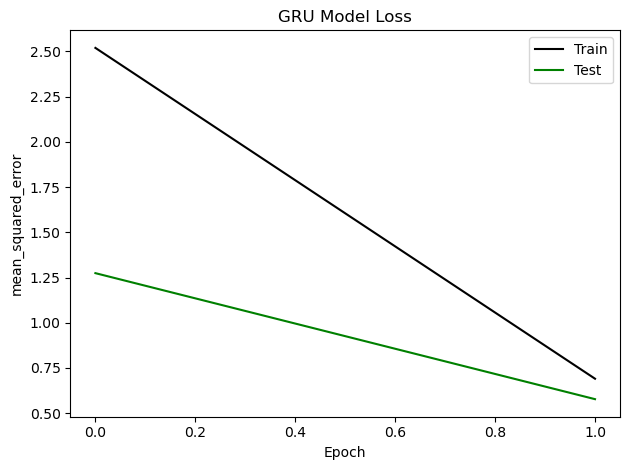

Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_72 (GRU)                (None, 5, 15)             945       
                                                                 
 gru_73 (GRU)                (None, 5, 5)              330       
                                                                 
 gru_74 (GRU)                (None, 5)                 180       
                                                                 
 dense_138 (Dense)           (None, 10)                60        
                                                                 
Total params: 1,515
Trainable params: 1,515
Non-trainable params: 0
_________________________________________________________________


In [62]:
predictor1 = OptimizePureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (5, 'relu'), 'layer1': (5,'relu'), 'layer2': (5, 'relu')},
            {'layer0': (15, 'relu'), 'layer1': (5,'relu'), 'layer2': (5, 'relu')},
            {'layer0': (55, 'relu'), 'layer1': (5,'relu'), 'layer2': (5, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_gru(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/2
516/516 [==============================] - 8s 7ms/step - loss: 1.9956 - mean_squared_error: 1.9956 - val_loss: 1.1991 - val_mean_squared_error: 1.1991
Epoch 2/2
516/516 [==============================] - 4s 8ms/step - loss: 0.6507 - mean_squared_error: 0.6507 - val_loss: 0.5394 - val_mean_squared_error: 0.5394


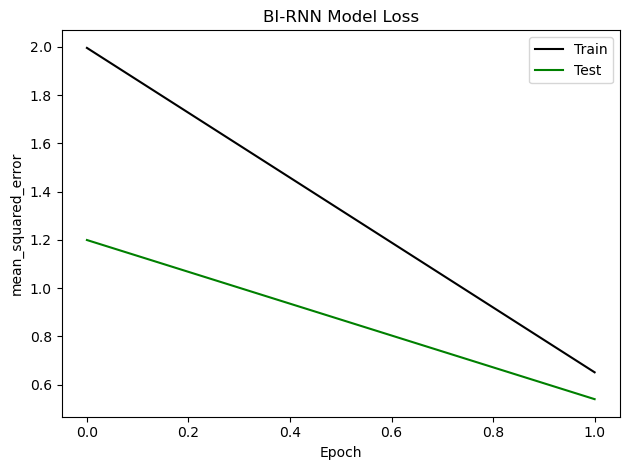

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_24 (Bidirecti  (None, 5, 10)            100       
 onal)                                                           
                                                                 
 simple_rnn_74 (SimpleRNN)   (None, 5)                 80        
                                                                 
 dense_139 (Dense)           (None, 10)                60        
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


In [63]:
predictor1 = PureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_birnn(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                        layer_config = {'layer0': (5, 'relu'), 'layer1': (5, 'relu')}
                       )
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

[I 2023-03-09 00:49:22,306] A new study created in memory with name: no-name-505f55d2-0570-4467-85b4-e5837fb47896


Epoch 1/2
516/516 [==============================] - 6s 7ms/step - loss: 1.4829 - mean_squared_error: 1.4829 - val_loss: 1.4668 - val_mean_squared_error: 1.4668
Epoch 2/2
516/516 [==============================] - 5s 9ms/step - loss: 1.2378 - mean_squared_error: 1.2378 - val_loss: 1.3483 - val_mean_squared_error: 1.3483


[I 2023-03-09 00:49:33,161] Trial 0 finished with value: 1.2377651929855347 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (25, 'relu'), 'layer1': (25, 'relu')}}. Best is trial 0 with value: 1.2377651929855347.


Epoch 1/2
516/516 [==============================] - 6s 7ms/step - loss: 1.6173 - mean_squared_error: 1.6173 - val_loss: 1.5816 - val_mean_squared_error: 1.5816
Epoch 2/2
516/516 [==============================] - 4s 8ms/step - loss: 1.2225 - mean_squared_error: 1.2225 - val_loss: 1.2971 - val_mean_squared_error: 1.2971


[I 2023-03-09 00:49:43,708] Trial 1 finished with value: 1.2225435972213745 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (15, 'relu')}}. Best is trial 1 with value: 1.2225435972213745.


Epoch 1/2
516/516 [==============================] - 8s 10ms/step - loss: 1.5559 - mean_squared_error: 1.5559 - val_loss: 0.5384 - val_mean_squared_error: 0.5384
Epoch 2/2
516/516 [==============================] - 4s 8ms/step - loss: 0.5253 - mean_squared_error: 0.5253 - val_loss: 0.4942 - val_mean_squared_error: 0.4942


[I 2023-03-09 00:49:56,385] Trial 2 finished with value: 0.5252726078033447 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (15, 'relu')}}. Best is trial 2 with value: 0.5252726078033447.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (15, 'relu')}}
Best result: 0.5252726078033447
Epoch 1/2
516/516 [==============================] - 8s 10ms/step - loss: 1.3523 - mean_squared_error: 1.3523 - val_loss: 0.4980 - val_mean_squared_error: 0.4980
Epoch 2/2
516/516 [==============================] - 3s 7ms/step - loss: 0.4901 - mean_squared_error: 0.4901 - val_loss: 0.4697 - val_mean_squared_error: 0.4697


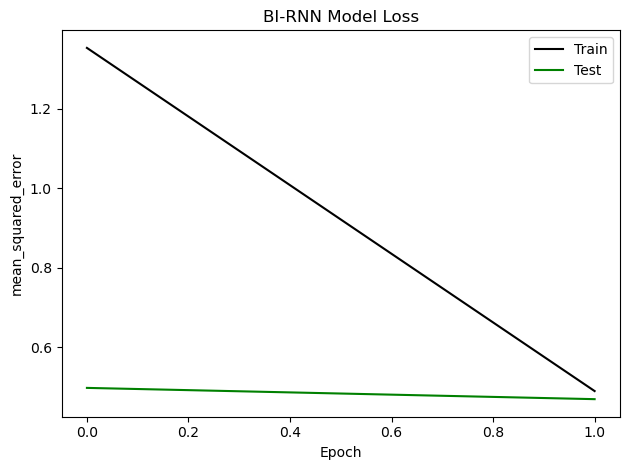

Model: "sequential_104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_28 (Bidirecti  (None, 5, 30)            600       
 onal)                                                           
                                                                 
 simple_rnn_82 (SimpleRNN)   (None, 15)                690       
                                                                 
 dense_143 (Dense)           (None, 10)                160       
                                                                 
Total params: 1,450
Trainable params: 1,450
Non-trainable params: 0
_________________________________________________________________


In [64]:
predictor1 = OptimizePureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (5, 'relu'), 'layer1': (5, 'relu')},
            {'layer0': (15, 'relu'), 'layer1': (15, 'relu')},
            {'layer0': (25, 'relu'), 'layer1': (25, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_birnn(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/2
516/516 [==============================] - 10s 9ms/step - loss: 2.3141 - mean_squared_error: 2.3141 - val_loss: 1.3251 - val_mean_squared_error: 1.3251
Epoch 2/2
516/516 [==============================] - 5s 9ms/step - loss: 1.0469 - mean_squared_error: 1.0469 - val_loss: 1.0092 - val_mean_squared_error: 1.0092


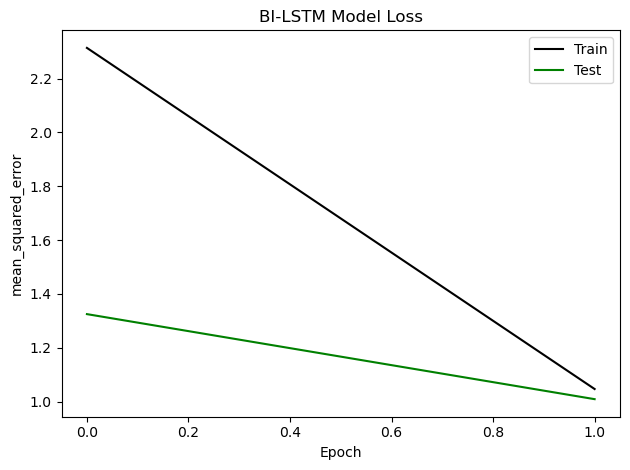

Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_29 (Bidirecti  (None, 3, 10)            400       
 onal)                                                           
                                                                 
 lstm_68 (LSTM)              (None, 5)                 320       
                                                                 
 dense_144 (Dense)           (None, 10)                60        
                                                                 
Total params: 780
Trainable params: 780
Non-trainable params: 0
_________________________________________________________________


In [65]:
predictor1 = PureMulti(steps_past =  3, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_bilstm(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                         layer_config = {'layer0': (5, 'relu'), 'layer1': (5, 'relu')}
                        )
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(3))
predictor1.model_blueprint()

[I 2023-03-09 00:50:25,333] A new study created in memory with name: no-name-cb6f8055-c438-4eed-9dcc-6b44619ddb8b


Epoch 1/2
516/516 [==============================] - 10s 13ms/step - loss: 1.5518 - mean_squared_error: 1.5518 - val_loss: 0.6427 - val_mean_squared_error: 0.6427
Epoch 2/2
516/516 [==============================] - 5s 10ms/step - loss: 0.5674 - mean_squared_error: 0.5674 - val_loss: 0.5551 - val_mean_squared_error: 0.5551


[I 2023-03-09 00:50:41,250] Trial 0 finished with value: 0.5673927664756775 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (15, 'relu')}}. Best is trial 0 with value: 0.5673927664756775.


Epoch 1/2
516/516 [==============================] - 12s 15ms/step - loss: 1.3918 - mean_squared_error: 1.3918 - val_loss: 0.5407 - val_mean_squared_error: 0.5407
Epoch 2/2
516/516 [==============================] - 6s 11ms/step - loss: 0.5414 - mean_squared_error: 0.5414 - val_loss: 0.5092 - val_mean_squared_error: 0.5092


[I 2023-03-09 00:50:59,645] Trial 1 finished with value: 0.5414345264434814 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (25, 'relu'), 'layer1': (25, 'relu')}}. Best is trial 1 with value: 0.5414345264434814.


Epoch 1/2
516/516 [==============================] - 11s 11ms/step - loss: 2.1345 - mean_squared_error: 2.1345 - val_loss: 1.5016 - val_mean_squared_error: 1.5016
Epoch 2/2
516/516 [==============================] - 6s 11ms/step - loss: 1.2780 - mean_squared_error: 1.2780 - val_loss: 1.4748 - val_mean_squared_error: 1.4748


[I 2023-03-09 00:51:16,353] Trial 2 finished with value: 1.2780494689941406 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (15, 'relu')}}. Best is trial 1 with value: 0.5414345264434814.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (25, 'relu'), 'layer1': (25, 'relu')}}
Best result: 0.5414345264434814
Epoch 1/2
516/516 [==============================] - 11s 14ms/step - loss: 1.3785 - mean_squared_error: 1.3785 - val_loss: 0.5438 - val_mean_squared_error: 0.5438
Epoch 2/2
516/516 [==============================] - 7s 14ms/step - loss: 0.5544 - mean_squared_error: 0.5544 - val_loss: 0.7572 - val_mean_squared_error: 0.7572


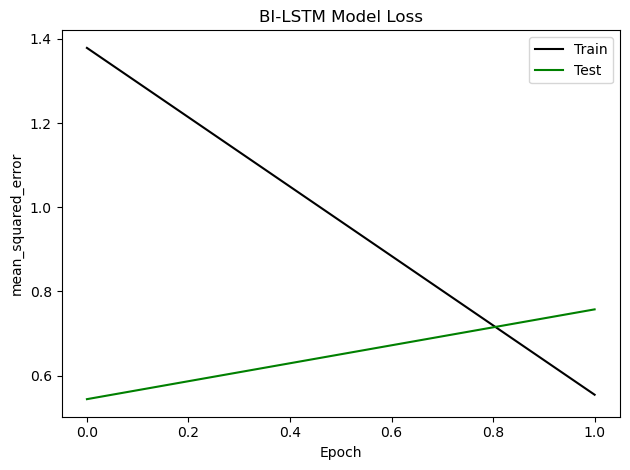

Model: "sequential_109"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_33 (Bidirecti  (None, 5, 50)            6000      
 onal)                                                           
                                                                 
 lstm_76 (LSTM)              (None, 25)                7600      
                                                                 
 dense_148 (Dense)           (None, 10)                260       
                                                                 
Total params: 13,860
Trainable params: 13,860
Non-trainable params: 0
_________________________________________________________________


In [66]:
predictor1 = OptimizePureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (5, 'relu'), 'layer1': (5, 'relu')},
            {'layer0': (15, 'relu'), 'layer1': (15, 'relu')},
            {'layer0': (25, 'relu'), 'layer1': (25, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_bilstm(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/7
516/516 [==============================] - 11s 12ms/step - loss: 2.2629 - mean_squared_error: 2.2629 - val_loss: 1.3949 - val_mean_squared_error: 1.3949
Epoch 2/7
516/516 [==============================] - 6s 12ms/step - loss: 1.0771 - mean_squared_error: 1.0771 - val_loss: 0.9712 - val_mean_squared_error: 0.9712
Epoch 3/7
516/516 [==============================] - 5s 9ms/step - loss: 0.6594 - mean_squared_error: 0.6594 - val_loss: 0.6561 - val_mean_squared_error: 0.6561
Epoch 4/7
516/516 [==============================] - 6s 13ms/step - loss: 0.5727 - mean_squared_error: 0.5727 - val_loss: 0.5606 - val_mean_squared_error: 0.5606
Epoch 5/7
516/516 [==============================] - 5s 10ms/step - loss: 0.5599 - mean_squared_error: 0.5599 - val_loss: 0.5294 - val_mean_squared_error: 0.5294
Epoch 6/7
516/516 [==============================] - 6s 11ms/step - loss: 0.5462 - mean_squared_error: 0.5462 - val_loss: 0.5233 - val_mean_squared_error: 0.5233
Epoch 7/7
516/516 [=========

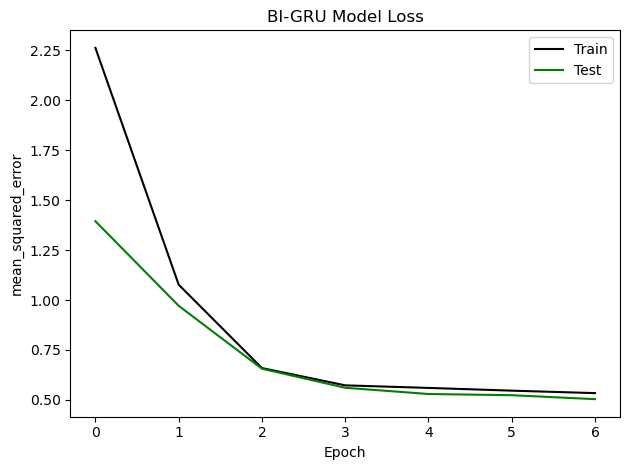

Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_34 (Bidirecti  (None, 5, 10)            330       
 onal)                                                           
                                                                 
 gru_76 (GRU)                (None, 5)                 255       
                                                                 
 dense_149 (Dense)           (None, 10)                60        
                                                                 
Total params: 645
Trainable params: 645
Non-trainable params: 0
_________________________________________________________________


In [67]:
predictor1 = PureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_bigru(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                        layer_config = {'layer0': (5, 'relu'), 'layer1': (5, 'relu')}
                       )
predictor1.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

[I 2023-03-09 00:52:23,580] A new study created in memory with name: no-name-5ee58f4c-86e1-4265-8aa6-53643a529e97


Epoch 1/2
516/516 [==============================] - 11s 14ms/step - loss: 1.8146 - mean_squared_error: 1.8146 - val_loss: 1.5155 - val_mean_squared_error: 1.5155
Epoch 2/2
516/516 [==============================] - 6s 11ms/step - loss: 1.2811 - mean_squared_error: 1.2811 - val_loss: 1.5168 - val_mean_squared_error: 1.5168


[I 2023-03-09 00:52:41,209] Trial 0 finished with value: 1.2811177968978882 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (25, 'relu'), 'layer1': (25, 'relu')}}. Best is trial 0 with value: 1.2811177968978882.


Epoch 1/2
516/516 [==============================] - 11s 12ms/step - loss: 1.6762 - mean_squared_error: 1.6762 - val_loss: 1.4548 - val_mean_squared_error: 1.4548
Epoch 2/2
516/516 [==============================] - 6s 11ms/step - loss: 1.2741 - mean_squared_error: 1.2741 - val_loss: 1.5151 - val_mean_squared_error: 1.5151


[I 2023-03-09 00:52:58,805] Trial 1 finished with value: 1.2741174697875977 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (25, 'relu'), 'layer1': (25, 'relu')}}. Best is trial 1 with value: 1.2741174697875977.


Epoch 1/2
516/516 [==============================] - 11s 11ms/step - loss: 1.7090 - mean_squared_error: 1.7090 - val_loss: 1.4823 - val_mean_squared_error: 1.4823
Epoch 2/2
516/516 [==============================] - 6s 12ms/step - loss: 1.2767 - mean_squared_error: 1.2767 - val_loss: 1.5193 - val_mean_squared_error: 1.5193


[I 2023-03-09 00:53:16,355] Trial 2 finished with value: 1.2766563892364502 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (25, 'relu'), 'layer1': (25, 'relu')}}. Best is trial 1 with value: 1.2741174697875977.


Best hyperparameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (25, 'relu'), 'layer1': (25, 'relu')}}
Best result: 1.2741174697875977
Epoch 1/2
516/516 [==============================] - 11s 13ms/step - loss: 1.8480 - mean_squared_error: 1.8480 - val_loss: 1.5211 - val_mean_squared_error: 1.5211
Epoch 2/2
516/516 [==============================] - 5s 11ms/step - loss: 1.2752 - mean_squared_error: 1.2752 - val_loss: 1.5045 - val_mean_squared_error: 1.5045


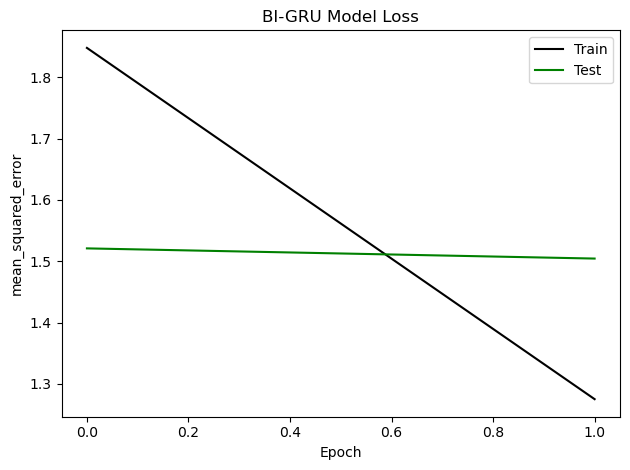

Model: "sequential_114"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_38 (Bidirecti  (None, 5, 50)            4650      
 onal)                                                           
                                                                 
 gru_84 (GRU)                (None, 25)                5775      
                                                                 
 dense_153 (Dense)           (None, 10)                260       
                                                                 
Total params: 10,685
Trainable params: 10,685
Non-trainable params: 0
_________________________________________________________________


In [68]:
predictor1 = OptimizePureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (5, 'relu'), 'layer1': (5, 'relu')},
            {'layer0': (15, 'relu'), 'layer1': (15, 'relu')},
            {'layer0': (25, 'relu'), 'layer1': (25, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_bigru(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/7
516/516 [==============================] - 12s 17ms/step - loss: 1.3740 - mean_squared_error: 1.3740 - val_loss: 1.5770 - val_mean_squared_error: 1.5770
Epoch 2/7
516/516 [==============================] - 8s 16ms/step - loss: 1.1799 - mean_squared_error: 1.1799 - val_loss: 1.2382 - val_mean_squared_error: 1.2382
Epoch 3/7
516/516 [==============================] - 8s 15ms/step - loss: 0.8476 - mean_squared_error: 0.8476 - val_loss: 0.5708 - val_mean_squared_error: 0.5708
Epoch 4/7
516/516 [==============================] - 8s 15ms/step - loss: 0.5659 - mean_squared_error: 0.5659 - val_loss: 0.5327 - val_mean_squared_error: 0.5327
Epoch 5/7
516/516 [==============================] - 8s 16ms/step - loss: 0.5479 - mean_squared_error: 0.5479 - val_loss: 0.5266 - val_mean_squared_error: 0.5266
Epoch 6/7
516/516 [==============================] - 8s 16ms/step - loss: 0.5422 - mean_squared_error: 0.5422 - val_loss: 0.5166 - val_mean_squared_error: 0.5166
Epoch 7/7
516/516 [========

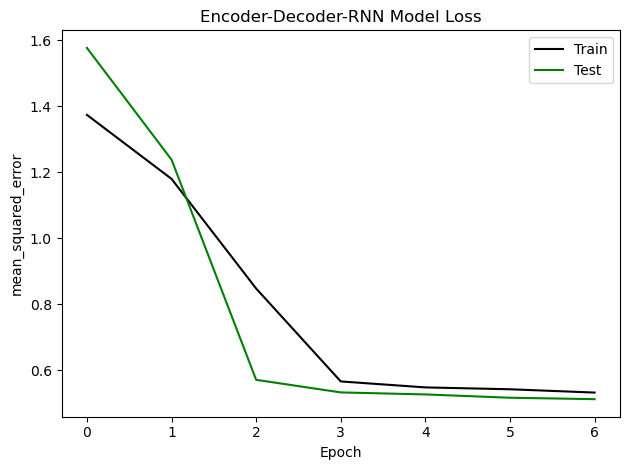

Model: "sequential_115"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_83 (SimpleRNN)   (None, 5, 5)              50        
                                                                 
 simple_rnn_84 (SimpleRNN)   (None, 5)                 55        
                                                                 
 repeat_vector_16 (RepeatVec  (None, 10, 5)            0         
 tor)                                                            
                                                                 
 simple_rnn_85 (SimpleRNN)   (None, 10, 5)             55        
                                                                 
 simple_rnn_86 (SimpleRNN)   (None, 10, 100)           10600     
                                                                 
 time_distributed_112 (TimeD  (None, 10, 1)            101       
 istributed)                                        

In [69]:
predictor9 = PureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor9.create_encdec_rnn(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error',
                             layer_config = {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (100, 'relu')})
predictor9.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor9.show_performance()
predictor9.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor9.model_blueprint()

[I 2023-03-09 00:54:37,866] A new study created in memory with name: no-name-3b4d4a60-a766-4d1a-9cc0-5513f3fde450


Epoch 1/2
516/516 [==============================] - 13s 19ms/step - loss: 1.3770 - mean_squared_error: 1.3770 - val_loss: 1.4773 - val_mean_squared_error: 1.4773
Epoch 2/2
516/516 [==============================] - 9s 17ms/step - loss: 1.2866 - mean_squared_error: 1.2866 - val_loss: 1.5704 - val_mean_squared_error: 1.5704


[I 2023-03-09 00:54:59,775] Trial 0 finished with value: 1.2865519523620605 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (100, 'relu')}}. Best is trial 0 with value: 1.2865519523620605.


Epoch 1/2
516/516 [==============================] - 36s 61ms/step - loss: 1.5725 - mean_squared_error: 1.5725 - val_loss: 1.6318 - val_mean_squared_error: 1.6318
Epoch 2/2
516/516 [==============================] - 27s 52ms/step - loss: 0.9273 - mean_squared_error: 0.9273 - val_loss: 0.5570 - val_mean_squared_error: 0.5570


[I 2023-03-09 00:56:03,222] Trial 1 finished with value: 0.9273417592048645 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (25, 'relu'), 'layer1': (25, 'relu'), 'layer2': (5, 'relu'), 'layer3': (300, 'relu')}}. Best is trial 1 with value: 0.9273417592048645.


Epoch 1/2
516/516 [==============================] - 21s 34ms/step - loss: 1.0191 - mean_squared_error: 1.0191 - val_loss: 0.5132 - val_mean_squared_error: 0.5132
Epoch 2/2
516/516 [==============================] - 17s 34ms/step - loss: 0.5285 - mean_squared_error: 0.5285 - val_loss: 0.4943 - val_mean_squared_error: 0.4943


[I 2023-03-09 00:56:41,650] Trial 2 finished with value: 0.5284901857376099 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (15, 'relu'), 'layer2': (5, 'relu'), 'layer3': (200, 'relu')}}. Best is trial 2 with value: 0.5284901857376099.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (15, 'relu'), 'layer2': (5, 'relu'), 'layer3': (200, 'relu')}}
Best result: 0.5284901857376099
Epoch 1/2
516/516 [==============================] - 21s 35ms/step - loss: 0.9941 - mean_squared_error: 0.9941 - val_loss: 0.5596 - val_mean_squared_error: 0.5596
Epoch 2/2
516/516 [==============================] - 17s 33ms/step - loss: 0.5797 - mean_squared_error: 0.5797 - val_loss: 0.5211 - val_mean_squared_error: 0.5211


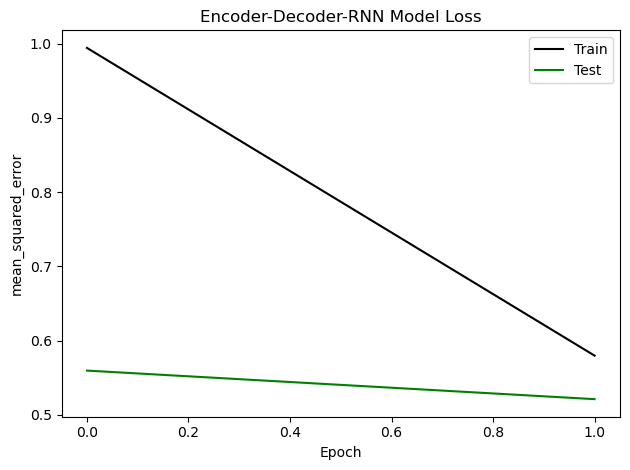

Model: "sequential_119"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_99 (SimpleRNN)   (None, 5, 15)             300       
                                                                 
 simple_rnn_100 (SimpleRNN)  (None, 15)                465       
                                                                 
 repeat_vector_20 (RepeatVec  (None, 10, 15)           0         
 tor)                                                            
                                                                 
 simple_rnn_101 (SimpleRNN)  (None, 10, 5)             105       
                                                                 
 simple_rnn_102 (SimpleRNN)  (None, 10, 200)           41200     
                                                                 
 time_distributed_116 (TimeD  (None, 10, 1)            201       
 istributed)                                        

In [70]:
predictor1 = OptimizePureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (100, 'relu')},
            {'layer0': (15, 'relu'), 'layer1': (15, 'relu'), 'layer2': (5, 'relu'), 'layer3': (200, 'relu')},
            {'layer0': (25, 'relu'), 'layer1': (25, 'relu'), 'layer2': (5, 'relu'), 'layer3': (300, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_encdec_rnn(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/10
516/516 [==============================] - 23s 36ms/step - loss: 1.8353 - mean_squared_error: 1.8353 - val_loss: 1.3964 - val_mean_squared_error: 1.3964
Epoch 2/10
516/516 [==============================] - 19s 36ms/step - loss: 1.0628 - mean_squared_error: 1.0628 - val_loss: 0.6981 - val_mean_squared_error: 0.6981
Epoch 3/10
516/516 [==============================] - 18s 36ms/step - loss: 0.6277 - mean_squared_error: 0.6277 - val_loss: 0.5722 - val_mean_squared_error: 0.5722
Epoch 4/10
516/516 [==============================] - 18s 35ms/step - loss: 0.5757 - mean_squared_error: 0.5757 - val_loss: 0.6156 - val_mean_squared_error: 0.6156
Epoch 5/10
516/516 [==============================] - 18s 35ms/step - loss: 0.5631 - mean_squared_error: 0.5631 - val_loss: 0.5335 - val_mean_squared_error: 0.5335
Epoch 6/10
516/516 [==============================] - 19s 36ms/step - loss: 0.5592 - mean_squared_error: 0.5592 - val_loss: 0.5581 - val_mean_squared_error: 0.5581
Epoch 7/10
516/5

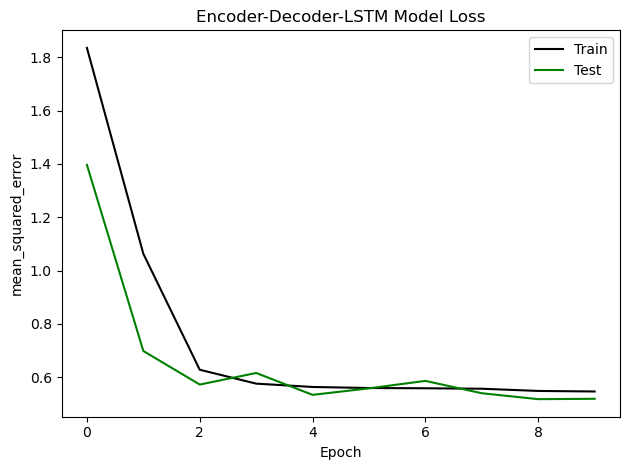

Model: "sequential_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_77 (LSTM)              (None, 5, 5)              200       
                                                                 
 lstm_78 (LSTM)              (None, 5)                 220       
                                                                 
 repeat_vector_21 (RepeatVec  (None, 10, 5)            0         
 tor)                                                            
                                                                 
 lstm_79 (LSTM)              (None, 10, 5)             220       
                                                                 
 lstm_80 (LSTM)              (None, 10, 100)           42400     
                                                                 
 time_distributed_117 (TimeD  (None, 10, 1)            101       
 istributed)                                        

In [71]:
predictor10 = PureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor10.create_encdec_lstm(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error',
                               layer_config = {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (100, 'relu')}
                              )
predictor10.fit_model(epochs = 10, show_progress= 1, validation_split = 0.20)
predictor10.show_performance()
predictor10.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor10.model_blueprint()

[I 2023-03-09 01:00:35,741] A new study created in memory with name: no-name-06174ce8-d494-4447-a04d-82ac1c231790


Epoch 1/2
516/516 [==============================] - 35s 60ms/step - loss: 1.4595 - mean_squared_error: 1.4595 - val_loss: 1.5638 - val_mean_squared_error: 1.5638
Epoch 2/2
516/516 [==============================] - 32s 62ms/step - loss: 1.2976 - mean_squared_error: 1.2976 - val_loss: 1.5129 - val_mean_squared_error: 1.5129


[I 2023-03-09 01:01:42,622] Trial 0 finished with value: 1.297605276107788 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (15, 'relu'), 'layer2': (5, 'relu'), 'layer3': (200, 'relu')}}. Best is trial 0 with value: 1.297605276107788.


Epoch 1/2
516/516 [==============================] - 25s 40ms/step - loss: 1.7887 - mean_squared_error: 1.7887 - val_loss: 1.3032 - val_mean_squared_error: 1.3032
Epoch 2/2
516/516 [==============================] - 22s 42ms/step - loss: 0.7500 - mean_squared_error: 0.7500 - val_loss: 0.6138 - val_mean_squared_error: 0.6138


[I 2023-03-09 01:02:30,954] Trial 1 finished with value: 0.7500337958335876 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (100, 'relu')}}. Best is trial 1 with value: 0.7500337958335876.


Epoch 1/2
516/516 [==============================] - 44s 78ms/step - loss: 1.4513 - mean_squared_error: 1.4513 - val_loss: 1.5170 - val_mean_squared_error: 1.5170
Epoch 2/2
516/516 [==============================] - 39s 75ms/step - loss: 1.2973 - mean_squared_error: 1.2973 - val_loss: 1.5294 - val_mean_squared_error: 1.5294


[I 2023-03-09 01:03:54,645] Trial 2 finished with value: 1.2973079681396484 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (15, 'relu'), 'layer2': (5, 'relu'), 'layer3': (200, 'relu')}}. Best is trial 1 with value: 0.7500337958335876.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (100, 'relu')}}
Best result: 0.7500337958335876
Epoch 1/2
516/516 [==============================] - 29s 44ms/step - loss: 1.7017 - mean_squared_error: 1.7017 - val_loss: 1.0063 - val_mean_squared_error: 1.0063
Epoch 2/2
516/516 [==============================] - 22s 43ms/step - loss: 0.6289 - mean_squared_error: 0.6289 - val_loss: 0.5786 - val_mean_squared_error: 0.5786


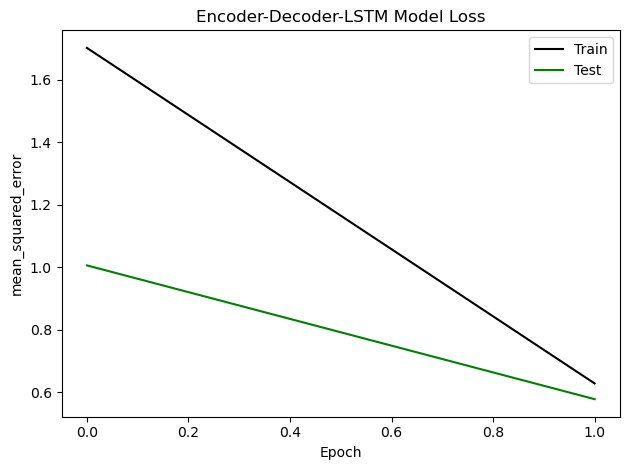

Model: "sequential_124"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_93 (LSTM)              (None, 5, 5)              200       
                                                                 
 lstm_94 (LSTM)              (None, 5)                 220       
                                                                 
 repeat_vector_25 (RepeatVec  (None, 10, 5)            0         
 tor)                                                            
                                                                 
 lstm_95 (LSTM)              (None, 10, 5)             220       
                                                                 
 lstm_96 (LSTM)              (None, 10, 100)           42400     
                                                                 
 time_distributed_121 (TimeD  (None, 10, 1)            101       
 istributed)                                        

In [72]:
predictor1 = OptimizePureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (100, 'relu')},
            {'layer0': (15, 'relu'), 'layer1': (15, 'relu'), 'layer2': (5, 'relu'), 'layer3': (200, 'relu')},
            {'layer0': (25, 'relu'), 'layer1': (25, 'relu'), 'layer2': (5, 'relu'), 'layer3': (300, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_encdec_lstm(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/2
516/516 [==============================] - 13s 15ms/step - loss: 2.0889 - mean_squared_error: 2.0889 - val_loss: 1.5344 - val_mean_squared_error: 1.5344
Epoch 2/2
516/516 [==============================] - 8s 15ms/step - loss: 1.2195 - mean_squared_error: 1.2195 - val_loss: 1.3465 - val_mean_squared_error: 1.3465


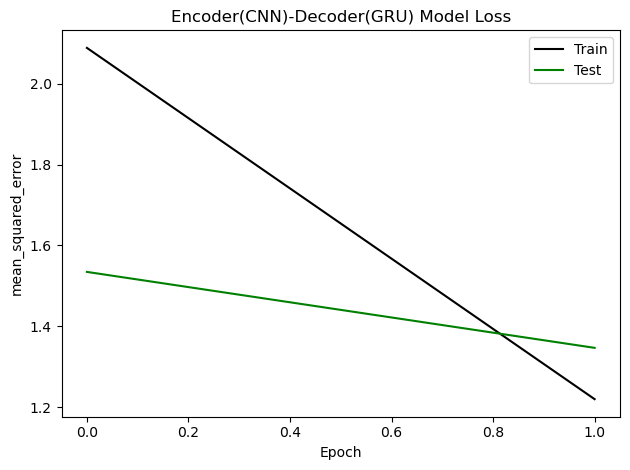

Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_74 (Conv1D)          (None, 5, 8)              40        
                                                                 
 conv1d_75 (Conv1D)          (None, 5, 4)              36        
                                                                 
 max_pooling1d_37 (MaxPoolin  (None, 2, 4)             0         
 g1D)                                                            
                                                                 
 flatten_37 (Flatten)        (None, 8)                 0         
                                                                 
 repeat_vector_26 (RepeatVec  (None, 10, 8)            0         
 tor)                                                            
                                                                 
 gru_85 (GRU)                (None, 10, 5)          

In [73]:
predictor11 = PureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor11.create_encdec_cnn(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error',
                              layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (10, 'relu')}
                             )
predictor11.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor11.show_performance()
predictor11.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor11.model_blueprint()

[I 2023-03-09 01:05:09,948] A new study created in memory with name: no-name-6db49d59-3b98-4bf6-8905-a252eb1c7e40


Epoch 1/2
516/516 [==============================] - 24s 38ms/step - loss: 1.5755 - mean_squared_error: 1.5755 - val_loss: 1.3916 - val_mean_squared_error: 1.3916
Epoch 2/2
516/516 [==============================] - 20s 39ms/step - loss: 0.9269 - mean_squared_error: 0.9269 - val_loss: 0.6011 - val_mean_squared_error: 0.6011


[I 2023-03-09 01:05:54,597] Trial 0 finished with value: 0.9268733859062195 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (28, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (110, 'relu')}}. Best is trial 0 with value: 0.9268733859062195.


Epoch 1/2
516/516 [==============================] - 22s 36ms/step - loss: 1.4122 - mean_squared_error: 1.4122 - val_loss: 1.5259 - val_mean_squared_error: 1.5259
Epoch 2/2
516/516 [==============================] - 19s 36ms/step - loss: 1.3012 - mean_squared_error: 1.3012 - val_loss: 1.5367 - val_mean_squared_error: 1.5367


[I 2023-03-09 01:06:35,203] Trial 1 finished with value: 1.301242470741272 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (28, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (110, 'relu')}}. Best is trial 0 with value: 0.9268733859062195.


Epoch 1/2
516/516 [==============================] - 26s 42ms/step - loss: 1.5344 - mean_squared_error: 1.5344 - val_loss: 1.3842 - val_mean_squared_error: 1.3842
Epoch 2/2
516/516 [==============================] - 22s 42ms/step - loss: 0.7696 - mean_squared_error: 0.7696 - val_loss: 0.6366 - val_mean_squared_error: 0.6366


[I 2023-03-09 01:07:23,769] Trial 2 finished with value: 0.7695693373680115 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (28, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (110, 'relu')}}. Best is trial 2 with value: 0.7695693373680115.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (28, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (110, 'relu')}}
Best result: 0.7695693373680115
Epoch 1/2
516/516 [==============================] - 25s 43ms/step - loss: 1.5899 - mean_squared_error: 1.5899 - val_loss: 1.4289 - val_mean_squared_error: 1.4289
Epoch 2/2
516/516 [==============================] - 21s 41ms/step - loss: 0.8570 - mean_squared_error: 0.8570 - val_loss: 0.6550 - val_mean_squared_error: 0.6550


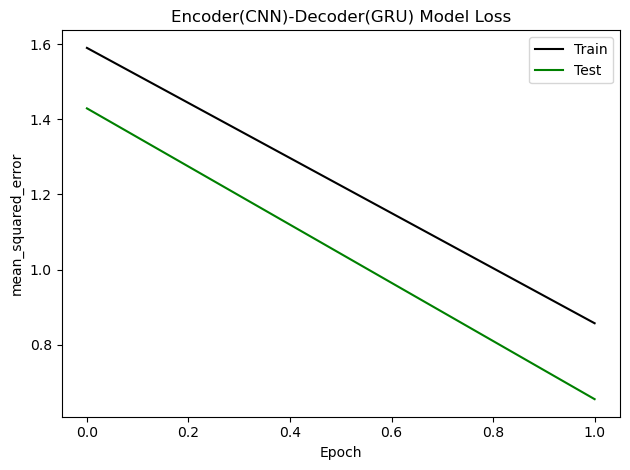

Model: "sequential_129"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_82 (Conv1D)          (None, 5, 28)             140       
                                                                 
 conv1d_83 (Conv1D)          (None, 5, 4)              116       
                                                                 
 max_pooling1d_41 (MaxPoolin  (None, 2, 4)             0         
 g1D)                                                            
                                                                 
 flatten_41 (Flatten)        (None, 8)                 0         
                                                                 
 repeat_vector_30 (RepeatVec  (None, 10, 8)            0         
 tor)                                                            
                                                                 
 gru_93 (GRU)                (None, 10, 5)          

In [74]:
predictor1 = OptimizePureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (18, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (100, 'relu')},
            {'layer0': (28, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (110, 'relu')},
            {'layer0': (38, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (210, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_encdec_cnn(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

Epoch 1/7
516/516 [==============================] - 29s 45ms/step - loss: 1.6528 - mean_squared_error: 1.6528 - val_loss: 1.4760 - val_mean_squared_error: 1.4760
Epoch 2/7
516/516 [==============================] - 23s 44ms/step - loss: 1.2025 - mean_squared_error: 1.2025 - val_loss: 1.3946 - val_mean_squared_error: 1.3946
Epoch 3/7
516/516 [==============================] - 21s 41ms/step - loss: 0.8236 - mean_squared_error: 0.8236 - val_loss: 0.5129 - val_mean_squared_error: 0.5129
Epoch 4/7
516/516 [==============================] - 21s 42ms/step - loss: 0.5280 - mean_squared_error: 0.5280 - val_loss: 0.5124 - val_mean_squared_error: 0.5124
Epoch 5/7
516/516 [==============================] - 24s 46ms/step - loss: 0.5232 - mean_squared_error: 0.5232 - val_loss: 0.4971 - val_mean_squared_error: 0.4971
Epoch 6/7
516/516 [==============================] - 21s 41ms/step - loss: 0.5190 - mean_squared_error: 0.5190 - val_loss: 0.4967 - val_mean_squared_error: 0.4967
Epoch 7/7
516/516 [===

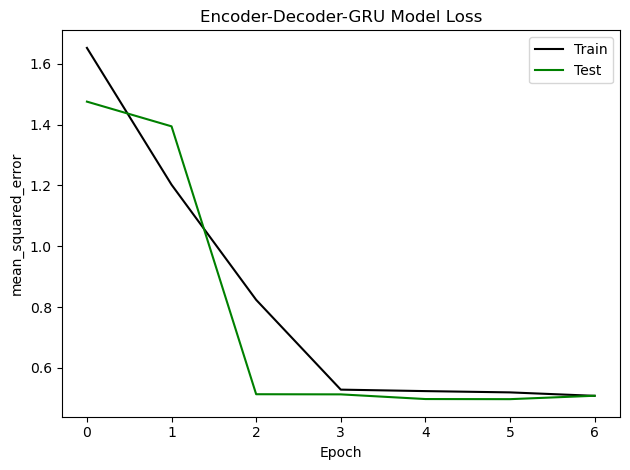

Model: "sequential_130"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_95 (GRU)                (None, 5, 5)              165       
                                                                 
 gru_96 (GRU)                (None, 5)                 180       
                                                                 
 repeat_vector_31 (RepeatVec  (None, 10, 5)            0         
 tor)                                                            
                                                                 
 gru_97 (GRU)                (None, 10, 5)             180       
                                                                 
 gru_98 (GRU)                (None, 10, 100)           32100     
                                                                 
 time_distributed_127 (TimeD  (None, 10, 1)            101       
 istributed)                                        

In [75]:
predictor12 = PureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor12.create_encdec_gru(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_squared_error',
                              layer_config = {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (100, 'relu')}
                             )
predictor12.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor12.show_performance()
predictor12.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor12.model_blueprint()

[I 2023-03-09 01:10:56,021] A new study created in memory with name: no-name-3ad28c07-9eff-4795-8fd9-4877db92ece8


Epoch 1/2
516/516 [==============================] - 42s 73ms/step - loss: 1.4211 - mean_squared_error: 1.4211 - val_loss: 1.5477 - val_mean_squared_error: 1.5477
Epoch 2/2
516/516 [==============================] - 37s 71ms/step - loss: 1.3010 - mean_squared_error: 1.3010 - val_loss: 1.5506 - val_mean_squared_error: 1.5506


[I 2023-03-09 01:12:15,740] Trial 0 finished with value: 1.3009610176086426 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (15, 'relu'), 'layer2': (5, 'relu'), 'layer3': (200, 'relu')}}. Best is trial 0 with value: 1.3009610176086426.


Epoch 1/2
516/516 [==============================] - 44s 74ms/step - loss: 1.4306 - mean_squared_error: 1.4306 - val_loss: 0.6927 - val_mean_squared_error: 0.6927
Epoch 2/2
516/516 [==============================] - 38s 73ms/step - loss: 0.5853 - mean_squared_error: 0.5853 - val_loss: 0.5214 - val_mean_squared_error: 0.5214


[I 2023-03-09 01:13:38,552] Trial 1 finished with value: 0.5852532982826233 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (15, 'relu'), 'layer2': (5, 'relu'), 'layer3': (200, 'relu')}}. Best is trial 1 with value: 0.5852532982826233.


Epoch 1/2
516/516 [==============================] - 30s 45ms/step - loss: 1.4194 - mean_squared_error: 1.4194 - val_loss: 1.5316 - val_mean_squared_error: 1.5316
Epoch 2/2
516/516 [==============================] - 22s 43ms/step - loss: 1.3021 - mean_squared_error: 1.3021 - val_loss: 1.5402 - val_mean_squared_error: 1.5402


[I 2023-03-09 01:14:31,352] Trial 2 finished with value: 1.3021142482757568 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (100, 'relu')}}. Best is trial 1 with value: 0.5852532982826233.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (15, 'relu'), 'layer1': (15, 'relu'), 'layer2': (5, 'relu'), 'layer3': (200, 'relu')}}
Best result: 0.5852532982826233
Epoch 1/2
516/516 [==============================] - 46s 75ms/step - loss: 1.4612 - mean_squared_error: 1.4612 - val_loss: 0.9189 - val_mean_squared_error: 0.9189
Epoch 2/2
516/516 [==============================] - 38s 73ms/step - loss: 0.6166 - mean_squared_error: 0.6166 - val_loss: 0.5144 - val_mean_squared_error: 0.5144


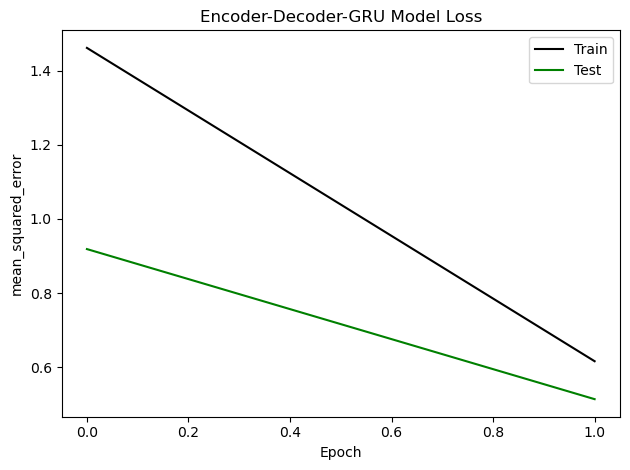

Model: "sequential_134"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_111 (GRU)               (None, 5, 15)             945       
                                                                 
 gru_112 (GRU)               (None, 15)                1440      
                                                                 
 repeat_vector_35 (RepeatVec  (None, 10, 15)           0         
 tor)                                                            
                                                                 
 gru_113 (GRU)               (None, 10, 5)             330       
                                                                 
 gru_114 (GRU)               (None, 10, 200)           124200    
                                                                 
 time_distributed_131 (TimeD  (None, 10, 1)            201       
 istributed)                                        

In [76]:
predictor1 = OptimizePureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (5, 'relu'), 'layer1': (5, 'relu'), 'layer2': (5, 'relu'), 'layer3': (100, 'relu')},
            {'layer0': (15, 'relu'), 'layer1': (15, 'relu'), 'layer2': (5, 'relu'), 'layer3': (200, 'relu')},
            {'layer0': (25, 'relu'), 'layer1': (25, 'relu'), 'layer2': (5, 'relu'), 'layer3': (300, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_encdec_gru(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))
predictor1.model_blueprint()

In [77]:
#predictor1.save_model()

In [78]:
load = PureMulti(steps_past =  5, steps_future = 10, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')

In [79]:
load.set_model_id('Loaded Model')

In [80]:
load.load_model('multivarpure')

In [81]:
load.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(5))

,Loaded Model
0,0.075128
1,0.108853
2,0.193759
3,0.460526
4,0.447316
5,0.434365
6,0.224555
7,0.500623
8,0.212859
9,0.355992


In [82]:
from imbrium.predictors.multivarhybrid import HybridMulti, OptimizeHybridMulti
from imbrium.utils.optimization import seeker

In [83]:
import pandas as pd
data = pd.read_csv('example_dataset/CaliforniaHousing.csv')

Epoch 1/3
516/516 [==============================] - 7s 8ms/step - loss: 3.3411 - mean_squared_error: 3.3411 - val_loss: 2.1882 - val_mean_squared_error: 2.1882
Epoch 2/3
516/516 [==============================] - 3s 6ms/step - loss: 1.4320 - mean_squared_error: 1.4320 - val_loss: 1.4801 - val_mean_squared_error: 1.4801
Epoch 3/3
516/516 [==============================] - 3s 5ms/step - loss: 1.2634 - mean_squared_error: 1.2634 - val_loss: 1.5180 - val_mean_squared_error: 1.5180
Epoch 3: early stopping


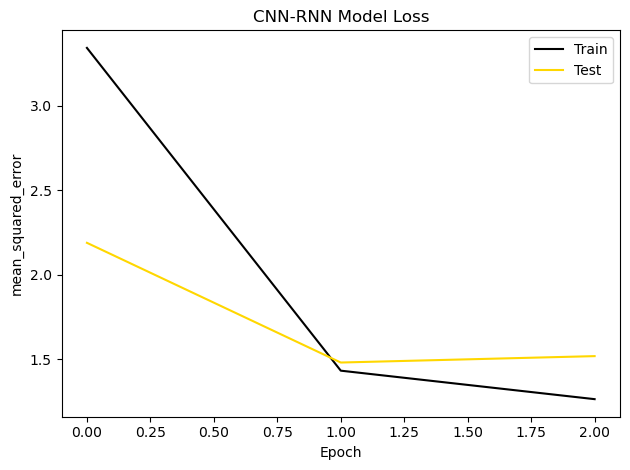

Model: "sequential_135"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_132 (TimeD  (None, 2, 20, 8)         16        
 istributed)                                                     
                                                                 
 time_distributed_133 (TimeD  (None, 2, 20, 4)         36        
 istributed)                                                     
                                                                 
 time_distributed_134 (TimeD  (None, 2, 10, 4)         0         
 istributed)                                                     
                                                                 
 time_distributed_135 (TimeD  (None, 2, 40)            0         
 istributed)                                                     
                                                                 
 simple_rnn_103 (SimpleRNN)  (None, 2, 5)           

In [84]:
predictor1 = HybridMulti(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_cnnrnn(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                         layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}
                        )
predictor1.fit_model(epochs = 3, show_progress= 1, validation_split = 0.20, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

[I 2023-03-09 01:16:15,336] A new study created in memory with name: no-name-592d06de-8755-4a7f-8ab7-4572d4911da6


Epoch 1/2
516/516 [==============================] - 6s 6ms/step - loss: 1.3772 - mean_squared_error: 1.3772 - val_loss: 1.7413 - val_mean_squared_error: 1.7413
Epoch 2/2
516/516 [==============================] - 3s 5ms/step - loss: 1.2579 - mean_squared_error: 1.2579 - val_loss: 1.4526 - val_mean_squared_error: 1.4526


[I 2023-03-09 01:16:24,663] Trial 0 finished with value: 1.2579398155212402 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 0 with value: 1.2579398155212402.


Epoch 1/2
516/516 [==============================] - 7s 7ms/step - loss: 1.6685 - mean_squared_error: 1.6685 - val_loss: 1.4552 - val_mean_squared_error: 1.4552
Epoch 2/2
516/516 [==============================] - 3s 6ms/step - loss: 1.2533 - mean_squared_error: 1.2533 - val_loss: 1.5286 - val_mean_squared_error: 1.5286


[I 2023-03-09 01:16:35,221] Trial 1 finished with value: 1.2533459663391113 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 1 with value: 1.2533459663391113.


Epoch 1/2
516/516 [==============================] - 7s 6ms/step - loss: 1.8135 - mean_squared_error: 1.8135 - val_loss: 1.4890 - val_mean_squared_error: 1.4890
Epoch 2/2
516/516 [==============================] - 3s 5ms/step - loss: 1.2899 - mean_squared_error: 1.2899 - val_loss: 1.5265 - val_mean_squared_error: 1.5265


[I 2023-03-09 01:16:44,950] Trial 2 finished with value: 1.2899073362350464 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 1 with value: 1.2533459663391113.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}
Best result: 1.2533459663391113
Epoch 1/2
516/516 [==============================] - 9s 6ms/step - loss: 2.2125 - mean_squared_error: 2.2125 - val_loss: 1.4437 - val_mean_squared_error: 1.4437
Epoch 2/2
516/516 [==============================] - 4s 7ms/step - loss: 1.2276 - mean_squared_error: 1.2276 - val_loss: 1.3899 - val_mean_squared_error: 1.3899


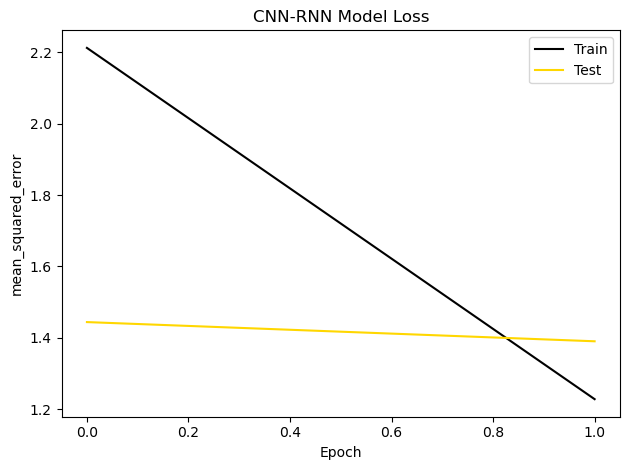

Model: "sequential_139"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_148 (TimeD  (None, 2, 20, 8)         16        
 istributed)                                                     
                                                                 
 time_distributed_149 (TimeD  (None, 2, 20, 4)         36        
 istributed)                                                     
                                                                 
 time_distributed_150 (TimeD  (None, 2, 10, 4)         0         
 istributed)                                                     
                                                                 
 time_distributed_151 (TimeD  (None, 2, 40)            0         
 istributed)                                                     
                                                                 
 simple_rnn_111 (SimpleRNN)  (None, 2, 5)           

In [85]:
predictor1 = OptimizeHybridMulti(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')},
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')},
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_cnnrnn(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

Epoch 1/2
516/516 [==============================] - 8s 9ms/step - loss: 1.1017 - mean_squared_error: 1.1017 - val_loss: 0.4667 - val_mean_squared_error: 0.4667
Epoch 2/2
516/516 [==============================] - 4s 8ms/step - loss: 0.4442 - mean_squared_error: 0.4442 - val_loss: 0.4142 - val_mean_squared_error: 0.4142


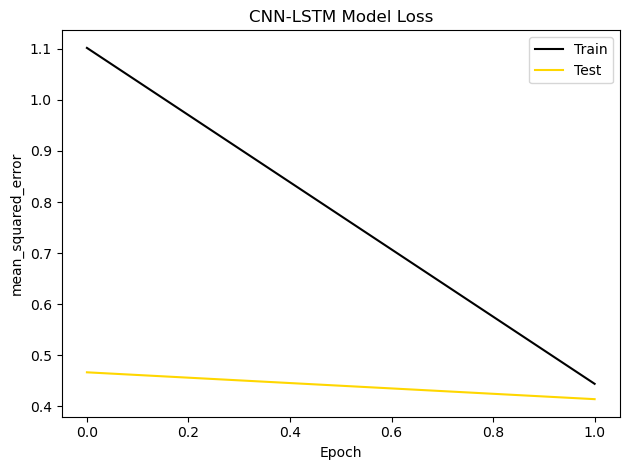

Model: "sequential_140"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_152 (TimeD  (None, 2, 20, 8)         16        
 istributed)                                                     
                                                                 
 time_distributed_153 (TimeD  (None, 2, 20, 4)         36        
 istributed)                                                     
                                                                 
 time_distributed_154 (TimeD  (None, 2, 10, 4)         0         
 istributed)                                                     
                                                                 
 time_distributed_155 (TimeD  (None, 2, 40)            0         
 istributed)                                                     
                                                                 
 lstm_97 (LSTM)              (None, 2, 5)           

In [86]:
predictor1 = HybridMulti(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'])
predictor1.create_cnnlstm(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                          layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}
                         )
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

[I 2023-03-09 01:17:12,670] A new study created in memory with name: no-name-3cab70f4-1aaa-4a35-a579-2bd23bb8fcc1


Epoch 1/2
516/516 [==============================] - 8s 10ms/step - loss: 2.2542 - mean_squared_error: 2.2542 - val_loss: 1.6927 - val_mean_squared_error: 1.6927
Epoch 2/2
516/516 [==============================] - 3s 6ms/step - loss: 1.3017 - mean_squared_error: 1.3017 - val_loss: 1.5250 - val_mean_squared_error: 1.5250


[I 2023-03-09 01:17:24,301] Trial 0 finished with value: 1.3017386198043823 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 0 with value: 1.3017386198043823.


Epoch 1/2
516/516 [==============================] - 9s 8ms/step - loss: 4.4580 - mean_squared_error: 4.4580 - val_loss: 4.6225 - val_mean_squared_error: 4.6225
Epoch 2/2
516/516 [==============================] - 4s 7ms/step - loss: 3.0585 - mean_squared_error: 3.0585 - val_loss: 3.3120 - val_mean_squared_error: 3.3120


[I 2023-03-09 01:17:37,065] Trial 1 finished with value: 3.058526039123535 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 0 with value: 1.3017386198043823.


Epoch 1/2
516/516 [==============================] - 8s 8ms/step - loss: 2.0419 - mean_squared_error: 2.0419 - val_loss: 1.4994 - val_mean_squared_error: 1.4994
Epoch 2/2
516/516 [==============================] - 5s 9ms/step - loss: 1.2773 - mean_squared_error: 1.2773 - val_loss: 1.4965 - val_mean_squared_error: 1.4965


[I 2023-03-09 01:17:50,487] Trial 2 finished with value: 1.2772924900054932 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 2 with value: 1.2772924900054932.


Best hyperparameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}
Best result: 1.2772924900054932
Epoch 1/2
516/516 [==============================] - 7s 8ms/step - loss: 2.1612 - mean_squared_error: 2.1612 - val_loss: 1.5884 - val_mean_squared_error: 1.5884
Epoch 2/2
516/516 [==============================] - 4s 8ms/step - loss: 1.2919 - mean_squared_error: 1.2919 - val_loss: 1.5104 - val_mean_squared_error: 1.5104


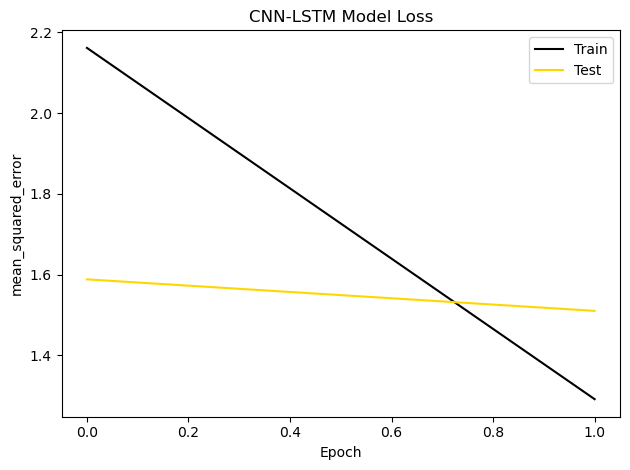

Model: "sequential_144"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_168 (TimeD  (None, 2, 20, 8)         16        
 istributed)                                                     
                                                                 
 time_distributed_169 (TimeD  (None, 2, 20, 4)         36        
 istributed)                                                     
                                                                 
 time_distributed_170 (TimeD  (None, 2, 10, 4)         0         
 istributed)                                                     
                                                                 
 time_distributed_171 (TimeD  (None, 2, 40)            0         
 istributed)                                                     
                                                                 
 lstm_105 (LSTM)             (None, 2, 5)           

In [87]:
predictor1 = OptimizeHybridMulti(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')},
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')},
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_cnnlstm(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

Epoch 1/10
516/516 [==============================] - 9s 10ms/step - loss: 2.4411 - mean_squared_error: 2.4411 - val_loss: 1.4873 - val_mean_squared_error: 1.4873
Epoch 2/10
516/516 [==============================] - 3s 6ms/step - loss: 1.2267 - mean_squared_error: 1.2267 - val_loss: 1.4496 - val_mean_squared_error: 1.4496
Epoch 3/10
516/516 [==============================] - 5s 9ms/step - loss: 0.9693 - mean_squared_error: 0.9693 - val_loss: 0.7722 - val_mean_squared_error: 0.7722
Epoch 4/10
516/516 [==============================] - 4s 7ms/step - loss: 0.7118 - mean_squared_error: 0.7118 - val_loss: 0.6516 - val_mean_squared_error: 0.6516
Epoch 5/10
516/516 [==============================] - 4s 7ms/step - loss: 0.6860 - mean_squared_error: 0.6860 - val_loss: 0.6466 - val_mean_squared_error: 0.6466
Epoch 6/10
516/516 [==============================] - 5s 9ms/step - loss: 0.6737 - mean_squared_error: 0.6737 - val_loss: 0.6370 - val_mean_squared_error: 0.6370
Epoch 7/10
516/516 [=======

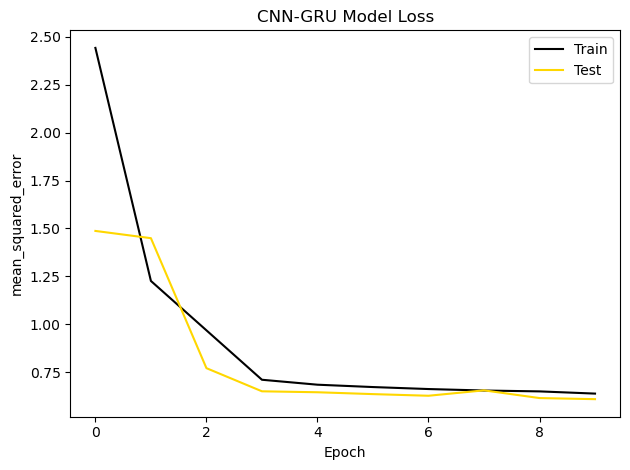

Model: "sequential_145"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_172 (TimeD  (None, 2, 20, 8)         16        
 istributed)                                                     
                                                                 
 time_distributed_173 (TimeD  (None, 2, 20, 4)         36        
 istributed)                                                     
                                                                 
 time_distributed_174 (TimeD  (None, 2, 10, 4)         0         
 istributed)                                                     
                                                                 
 time_distributed_175 (TimeD  (None, 2, 40)            0         
 istributed)                                                     
                                                                 
 gru_115 (GRU)               (None, 2, 5)           

In [88]:
predictor1 = HybridMulti(sub_seq = 2, steps_past = 10, steps_future = 15, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_cnngru(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                         layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}
                        )
predictor1.fit_model(epochs = 10, show_progress= 1, validation_split = 0.20)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

[I 2023-03-09 01:18:51,733] A new study created in memory with name: no-name-92db9237-ea38-4b2a-8f39-2c4110553a87


Epoch 1/2
516/516 [==============================] - 9s 8ms/step - loss: 1.9179 - mean_squared_error: 1.9179 - val_loss: 1.4422 - val_mean_squared_error: 1.4422
Epoch 2/2
516/516 [==============================] - 4s 7ms/step - loss: 1.2377 - mean_squared_error: 1.2377 - val_loss: 1.4844 - val_mean_squared_error: 1.4844


[I 2023-03-09 01:19:05,324] Trial 0 finished with value: 1.2376646995544434 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 0 with value: 1.2376646995544434.


Epoch 1/2
516/516 [==============================] - 8s 9ms/step - loss: 2.2542 - mean_squared_error: 2.2542 - val_loss: 1.6911 - val_mean_squared_error: 1.6911
Epoch 2/2
516/516 [==============================] - 4s 7ms/step - loss: 1.3023 - mean_squared_error: 1.3023 - val_loss: 1.5288 - val_mean_squared_error: 1.5288


[I 2023-03-09 01:19:17,043] Trial 1 finished with value: 1.302257776260376 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 0 with value: 1.2376646995544434.


Epoch 1/2
516/516 [==============================] - 8s 8ms/step - loss: 1.6075 - mean_squared_error: 1.6075 - val_loss: 1.4825 - val_mean_squared_error: 1.4825
Epoch 2/2
516/516 [==============================] - 4s 7ms/step - loss: 1.2586 - mean_squared_error: 1.2586 - val_loss: 1.4816 - val_mean_squared_error: 1.4816


[I 2023-03-09 01:19:28,452] Trial 2 finished with value: 1.2586473226547241 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 0 with value: 1.2376646995544434.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}
Best result: 1.2376646995544434
Epoch 1/2
516/516 [==============================] - 13s 14ms/step - loss: 2.1591 - mean_squared_error: 2.1591 - val_loss: 1.5080 - val_mean_squared_error: 1.5080
Epoch 2/2
516/516 [==============================] - 5s 10ms/step - loss: 1.2472 - mean_squared_error: 1.2472 - val_loss: 1.5110 - val_mean_squared_error: 1.5110


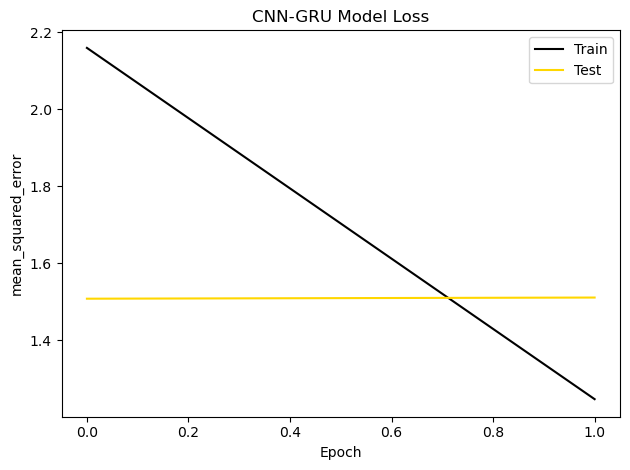

Model: "sequential_149"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_188 (TimeD  (None, 2, 20, 8)         16        
 istributed)                                                     
                                                                 
 time_distributed_189 (TimeD  (None, 2, 20, 4)         36        
 istributed)                                                     
                                                                 
 time_distributed_190 (TimeD  (None, 2, 10, 4)         0         
 istributed)                                                     
                                                                 
 time_distributed_191 (TimeD  (None, 2, 40)            0         
 istributed)                                                     
                                                                 
 gru_123 (GRU)               (None, 2, 5)           

In [89]:
predictor1 = OptimizeHybridMulti(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')},
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')},
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_cnngru(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

Epoch 1/2
516/516 [==============================] - 8s 8ms/step - loss: 2.0107 - mean_squared_error: 2.0107 - val_loss: 1.4310 - val_mean_squared_error: 1.4310
Epoch 2/2
516/516 [==============================] - 4s 8ms/step - loss: 1.2202 - mean_squared_error: 1.2202 - val_loss: 1.4001 - val_mean_squared_error: 1.4001


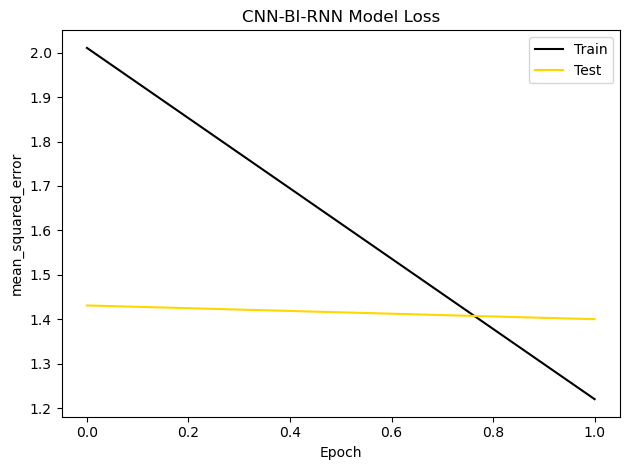

Model: "sequential_150"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_192 (TimeD  (None, 2, 20, 8)         16        
 istributed)                                                     
                                                                 
 time_distributed_193 (TimeD  (None, 2, 20, 4)         36        
 istributed)                                                     
                                                                 
 time_distributed_194 (TimeD  (None, 2, 10, 4)         0         
 istributed)                                                     
                                                                 
 time_distributed_195 (TimeD  (None, 2, 40)            0         
 istributed)                                                     
                                                                 
 bidirectional_39 (Bidirecti  (None, 2, 10)         

In [90]:
predictor1 = HybridMulti(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_cnnbirnn(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                           layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')})
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

[I 2023-03-09 01:20:01,431] A new study created in memory with name: no-name-ee1a2d6d-7db1-4a0b-ad34-86bee656e05d


Epoch 1/2
516/516 [==============================] - 6s 7ms/step - loss: 2.2457 - mean_squared_error: 2.2457 - val_loss: 1.6503 - val_mean_squared_error: 1.6503
Epoch 2/2
516/516 [==============================] - 4s 9ms/step - loss: 1.2938 - mean_squared_error: 1.2938 - val_loss: 1.5130 - val_mean_squared_error: 1.5130


[I 2023-03-09 01:20:12,378] Trial 0 finished with value: 1.2937884330749512 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 0 with value: 1.2937884330749512.


Epoch 1/2
516/516 [==============================] - 6s 8ms/step - loss: 1.5171 - mean_squared_error: 1.5171 - val_loss: 1.4877 - val_mean_squared_error: 1.4877
Epoch 2/2
516/516 [==============================] - 4s 8ms/step - loss: 1.2668 - mean_squared_error: 1.2668 - val_loss: 1.5857 - val_mean_squared_error: 1.5857


[I 2023-03-09 01:20:23,172] Trial 1 finished with value: 1.2667683362960815 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 1 with value: 1.2667683362960815.


Epoch 1/2
516/516 [==============================] - 6s 7ms/step - loss: 2.2567 - mean_squared_error: 2.2567 - val_loss: 1.6979 - val_mean_squared_error: 1.6979
Epoch 2/2
516/516 [==============================] - 3s 6ms/step - loss: 1.3041 - mean_squared_error: 1.3041 - val_loss: 1.5342 - val_mean_squared_error: 1.5342


[I 2023-03-09 01:20:32,861] Trial 2 finished with value: 1.3040950298309326 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 1 with value: 1.2667683362960815.


Best hyperparameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}
Best result: 1.2667683362960815
Epoch 1/2
516/516 [==============================] - 12s 7ms/step - loss: 2.2658 - mean_squared_error: 2.2658 - val_loss: 1.7001 - val_mean_squared_error: 1.7001
Epoch 2/2
516/516 [==============================] - 3s 6ms/step - loss: 1.3031 - mean_squared_error: 1.3031 - val_loss: 1.5285 - val_mean_squared_error: 1.5285


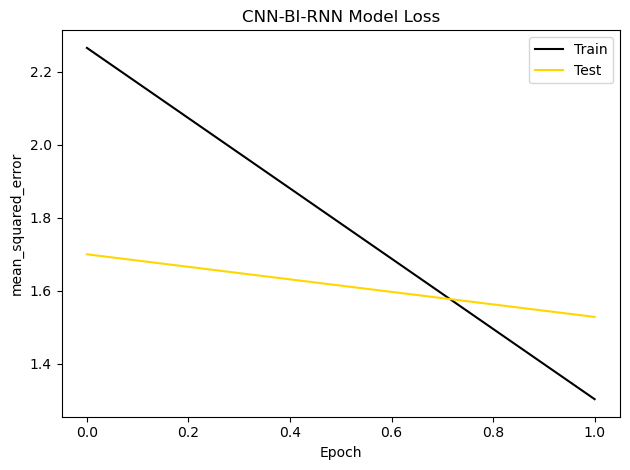

Model: "sequential_154"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_208 (TimeD  (None, 2, 20, 8)         16        
 istributed)                                                     
                                                                 
 time_distributed_209 (TimeD  (None, 2, 20, 4)         36        
 istributed)                                                     
                                                                 
 time_distributed_210 (TimeD  (None, 2, 10, 4)         0         
 istributed)                                                     
                                                                 
 time_distributed_211 (TimeD  (None, 2, 40)            0         
 istributed)                                                     
                                                                 
 bidirectional_43 (Bidirecti  (None, 2, 10)         

In [91]:
predictor1 = OptimizeHybridMulti(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')},
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')},
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_cnnbirnn(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

Epoch 1/2
516/516 [==============================] - 8s 8ms/step - loss: 3.1685 - mean_squared_error: 3.1685 - val_loss: 1.9493 - val_mean_squared_error: 1.9493
Epoch 2/2
516/516 [==============================] - 4s 8ms/step - loss: 1.2990 - mean_squared_error: 1.2990 - val_loss: 1.4794 - val_mean_squared_error: 1.4794


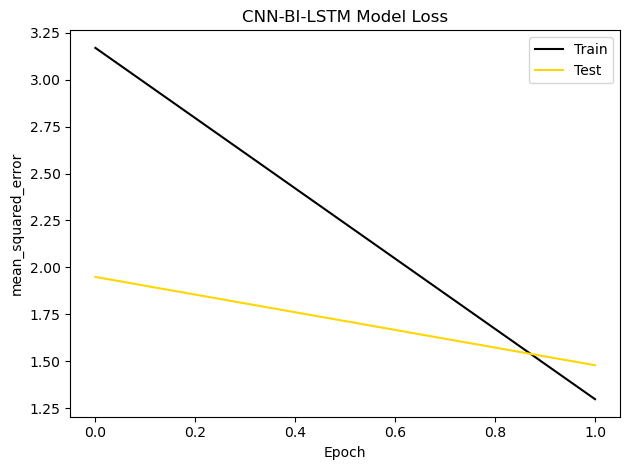

Model: "sequential_155"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_212 (TimeD  (None, 2, 20, 8)         16        
 istributed)                                                     
                                                                 
 time_distributed_213 (TimeD  (None, 2, 20, 4)         36        
 istributed)                                                     
                                                                 
 time_distributed_214 (TimeD  (None, 2, 10, 4)         0         
 istributed)                                                     
                                                                 
 time_distributed_215 (TimeD  (None, 2, 40)            0         
 istributed)                                                     
                                                                 
 bidirectional_44 (Bidirecti  (None, 2, 10)         

In [92]:
predictor1 = HybridMulti(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_cnnbilstm(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error',
                            layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')})
predictor1.fit_model(epochs = 2, show_progress= 1, validation_split = 0.20)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

[I 2023-03-09 01:21:02,197] A new study created in memory with name: no-name-c8beb892-7be5-4977-87a0-a048f2bfce2d


Epoch 1/2
516/516 [==============================] - 9s 10ms/step - loss: 2.2633 - mean_squared_error: 2.2633 - val_loss: 1.7015 - val_mean_squared_error: 1.7015
Epoch 2/2
516/516 [==============================] - 5s 10ms/step - loss: 1.3031 - mean_squared_error: 1.3031 - val_loss: 1.5300 - val_mean_squared_error: 1.5300


[I 2023-03-09 01:21:16,582] Trial 0 finished with value: 1.3031278848648071 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 0 with value: 1.3031278848648071.


Epoch 1/2
516/516 [==============================] - 15s 13ms/step - loss: 2.1825 - mean_squared_error: 2.1825 - val_loss: 1.5888 - val_mean_squared_error: 1.5888
Epoch 2/2
516/516 [==============================] - 5s 9ms/step - loss: 1.2912 - mean_squared_error: 1.2912 - val_loss: 1.5161 - val_mean_squared_error: 1.5161


[I 2023-03-09 01:21:37,194] Trial 1 finished with value: 1.2911741733551025 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 1 with value: 1.2911741733551025.


Epoch 1/2
516/516 [==============================] - 11s 8ms/step - loss: 2.2095 - mean_squared_error: 2.2095 - val_loss: 1.6297 - val_mean_squared_error: 1.6297
Epoch 2/2
516/516 [==============================] - 6s 11ms/step - loss: 1.2936 - mean_squared_error: 1.2936 - val_loss: 1.5163 - val_mean_squared_error: 1.5163


[I 2023-03-09 01:21:54,032] Trial 2 finished with value: 1.2935833930969238 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 1 with value: 1.2911741733551025.


Best hyperparameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}
Best result: 1.2911741733551025
Epoch 1/2
516/516 [==============================] - 13s 13ms/step - loss: 2.2250 - mean_squared_error: 2.2250 - val_loss: 1.6574 - val_mean_squared_error: 1.6574
Epoch 2/2
516/516 [==============================] - 8s 15ms/step - loss: 1.2973 - mean_squared_error: 1.2973 - val_loss: 1.5205 - val_mean_squared_error: 1.5205


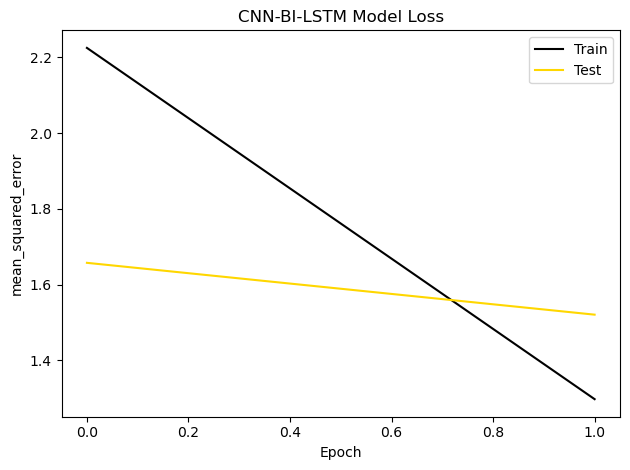

Model: "sequential_159"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_228 (TimeD  (None, 2, 20, 8)         16        
 istributed)                                                     
                                                                 
 time_distributed_229 (TimeD  (None, 2, 20, 4)         36        
 istributed)                                                     
                                                                 
 time_distributed_230 (TimeD  (None, 2, 10, 4)         0         
 istributed)                                                     
                                                                 
 time_distributed_231 (TimeD  (None, 2, 40)            0         
 istributed)                                                     
                                                                 
 bidirectional_48 (Bidirecti  (None, 2, 10)         

In [93]:
predictor1 = OptimizeHybridMulti(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')},
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')},
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_cnnbilstm(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

Epoch 1/7
516/516 [==============================] - 16s 13ms/step - loss: 1.8983 - mean_squared_error: 1.8983 - val_loss: 1.4281 - val_mean_squared_error: 1.4281
Epoch 2/7
516/516 [==============================] - 11s 21ms/step - loss: 1.2451 - mean_squared_error: 1.2451 - val_loss: 1.4687 - val_mean_squared_error: 1.4687
Epoch 2: early stopping


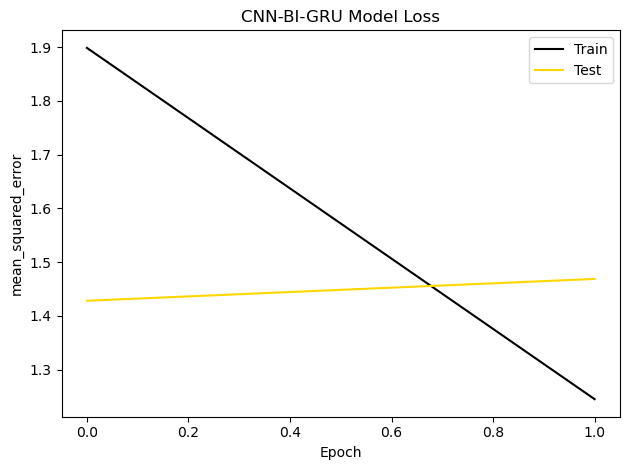

Model: "sequential_160"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_232 (TimeD  (None, 2, 20, 8)         16        
 istributed)                                                     
                                                                 
 time_distributed_233 (TimeD  (None, 2, 20, 4)         36        
 istributed)                                                     
                                                                 
 time_distributed_234 (TimeD  (None, 2, 10, 4)         0         
 istributed)                                                     
                                                                 
 time_distributed_235 (TimeD  (None, 2, 40)            0         
 istributed)                                                     
                                                                 
 bidirectional_49 (Bidirecti  (None, 2, 10)         

In [94]:
predictor1 = HybridMulti(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target','target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')
predictor1.create_cnnbigru(optimizer= 'adam', loss= 'mean_squared_error', metrics = 'mean_squared_error', layer_config = {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')})
predictor1.fit_model(epochs = 7, show_progress= 1, validation_split = 0.20, monitor='val_loss', patience=1, min_delta = 0, verbose = 1)
predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

[I 2023-03-09 01:22:46,183] A new study created in memory with name: no-name-3178f308-bf20-4a0a-9fe6-1493cd1f806a


Epoch 1/2
516/516 [==============================] - 12s 9ms/step - loss: 1.9891 - mean_squared_error: 1.9891 - val_loss: 1.5006 - val_mean_squared_error: 1.5006
Epoch 2/2
516/516 [==============================] - 7s 13ms/step - loss: 1.2408 - mean_squared_error: 1.2408 - val_loss: 1.5266 - val_mean_squared_error: 1.5266


[I 2023-03-09 01:23:05,542] Trial 0 finished with value: 1.240769624710083 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 0 with value: 1.240769624710083.


Epoch 1/2
516/516 [==============================] - 12s 12ms/step - loss: 1.8428 - mean_squared_error: 1.8428 - val_loss: 1.5125 - val_mean_squared_error: 1.5125
Epoch 2/2
516/516 [==============================] - 7s 13ms/step - loss: 1.2787 - mean_squared_error: 1.2787 - val_loss: 1.4920 - val_mean_squared_error: 1.4920


[I 2023-03-09 01:23:25,022] Trial 1 finished with value: 1.2787247896194458 and parameters: {'optimizer': 'sgd', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 0 with value: 1.240769624710083.


Epoch 1/2
516/516 [==============================] - 13s 10ms/step - loss: 2.1619 - mean_squared_error: 2.1619 - val_loss: 1.4522 - val_mean_squared_error: 1.4522
Epoch 2/2
516/516 [==============================] - 6s 11ms/step - loss: 1.2365 - mean_squared_error: 1.2365 - val_loss: 1.5113 - val_mean_squared_error: 1.5113


[I 2023-03-09 01:23:44,582] Trial 2 finished with value: 1.2364552021026611 and parameters: {'optimizer': 'adam', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}. Best is trial 2 with value: 1.2364552021026611.


Best hyperparameters: {'optimizer': 'adam', 'layer_config': {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': 2, 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}}
Best result: 1.2364552021026611
Epoch 1/2
516/516 [==============================] - 9s 9ms/step - loss: 2.1229 - mean_squared_error: 2.1229 - val_loss: 1.5203 - val_mean_squared_error: 1.5203
Epoch 2/2
516/516 [==============================] - 5s 10ms/step - loss: 1.2563 - mean_squared_error: 1.2563 - val_loss: 1.4485 - val_mean_squared_error: 1.4485


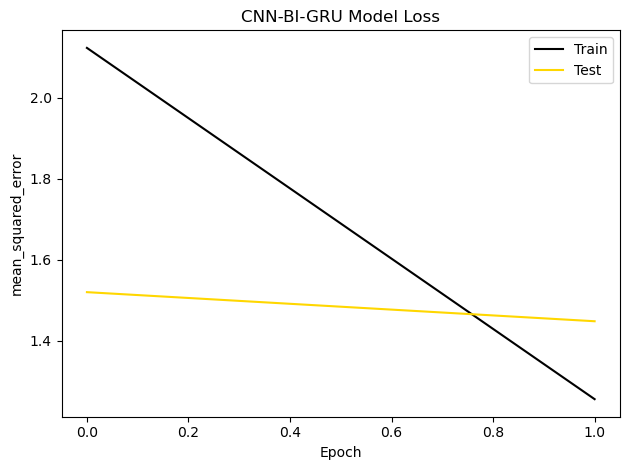

Model: "sequential_164"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_248 (TimeD  (None, 2, 20, 8)         16        
 istributed)                                                     
                                                                 
 time_distributed_249 (TimeD  (None, 2, 20, 4)         36        
 istributed)                                                     
                                                                 
 time_distributed_250 (TimeD  (None, 2, 10, 4)         0         
 istributed)                                                     
                                                                 
 time_distributed_251 (TimeD  (None, 2, 40)            0         
 istributed)                                                     
                                                                 
 bidirectional_53 (Bidirecti  (None, 2, 10)         

In [95]:
predictor1 = OptimizeHybridMulti(sub_seq = 2, steps_past = 10, steps_future = 5, data = data,features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')


@seeker(optimizer_range=["adam", "sgd"], 
        layer_config_range= [
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')},
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')},
            {'layer0': (8, 1, 'relu'), 'layer1': (4, 1, 'relu'), 'layer2': (2), 'layer3': (5, 'relu'), 'layer4': (5, 'relu')}
        ], 
        optimization_target='minimize', n_trials = 3)
def create_fit_model(predictor: object, *args, **kwargs):
    return predictor.create_fit_cnnbigru(*args, **kwargs)

create_fit_model(predictor1, loss='mean_squared_error', metrics='mean_squared_error', epochs=2,
                 show_progress=1, validation_split=0.20, monitor='val_loss', patience=2, min_delta=0, verbose=1
                )


predictor1.show_performance()
predictor1.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))
predictor1.model_blueprint()

In [96]:
#predictor1.save_model()

In [97]:
load = HybridMulti(sub_seq = 2, steps_past =  10, steps_future = 5, data = data, features = ['target', 'target', 'HouseAge', 'AveRooms', 'AveBedrms'], scale = 'normalize')

In [98]:
load.set_model_id('Loaded Model')

In [99]:
load.load_model('multivarhybrid')

In [100]:
load.predict(data[['target', 'HouseAge', 'AveRooms', 'AveBedrms']].tail(10))

,Loaded Model
0,36.033466
1,30.790028
2,30.917728
3,31.867062
4,25.314798
